# COVID-19 Vaccines Administered Worldwide
---
This is the first notebook in a series of notebooks that will primarily focus on Exploratory Data Analysis and creating a baseline model.

## Libraries

In [2]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os, shutil
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_rows', 55)

## OWID:  Vaccine Dataset

This dataset a wide array of information and demographic regarding the COVID-19 vaccine.

Data downloaded from Our World in Data here: 

[Our World in Data Coronavirus Vaccine site](https://ourworldindata.org/covid-vaccinations)

In [2]:
owid_df = pd.read_csv('../data/new_owid-covid-data.csv')

In [3]:
owid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80986 entries, 0 to 80985
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               80986 non-null  object 
 1   continent                              77046 non-null  object 
 2   location                               80986 non-null  object 
 3   date                                   80986 non-null  object 
 4   total_cases                            79291 non-null  float64
 5   new_cases                              79289 non-null  float64
 6   new_cases_smoothed                     78288 non-null  float64
 7   total_deaths                           69788 non-null  float64
 8   new_deaths                             69946 non-null  float64
 9   new_deaths_smoothed                    78288 non-null  float64
 10  total_cases_per_million                78861 non-null  float64
 11  ne

In [4]:
owid_df.isna().sum()

iso_code                          0
continent                      3940
location                          0
date                              0
total_cases                    1695
                              ...  
male_smokers                  23728
handwashing_facilities        43784
hospital_beds_per_thousand    13307
life_expectancy                4104
human_development_index        6990
Length: 59, dtype: int64

Column descriptions for this dataset

https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [5]:
owid_df.head(15).T

0            1            2   \
iso_code                            AFG          AFG          AFG   
continent                          Asia         Asia         Asia   
location                    Afghanistan  Afghanistan  Afghanistan   
date                         2020-02-24   2020-02-25   2020-02-26   
total_cases                         1.0          1.0          1.0   
...                                 ...          ...          ...   
male_smokers                        NaN          NaN          NaN   
handwashing_facilities           37.746       37.746       37.746   
hospital_beds_per_thousand          0.5          0.5          0.5   
life_expectancy                   64.83        64.83        64.83   
human_development_index           0.511        0.511        0.511   

                                     3            4            5   \
iso_code                            AFG          AFG          AFG   
continent                          Asia         Asia         Asia   
location                    Afghanistan  Afghanistan  Afghanistan   
date                         2020-02-27   2020-02-28   2020-02-29   
total_cases                         1.0          1.0          1.0   
...                                 ...          ...          ...   
male_smokers                        NaN          NaN          NaN   
handwashing_facilities           37.746       37.746       37.746   
hospital_beds_per_thousand          0.5          0.5          0.5   
life_expectancy                   64.83        64.83        64.83   
human_development_index           0.511        0.511        0.511   

                                     6            7            8   \
iso_code                            AFG          AFG          AFG   
continent                          Asia         Asia         Asia   
location                    Afghanistan  Afghanistan  Afghanistan   
date                         2020-03-01   2020-03-02   2020-03-03   
total_cases                         1.0          1.0          2.0   
...                                 ...          ...          ...   
male_smokers                        NaN          NaN          NaN   
handwashing_facilities           37.746       37.746       37.746   
hospital_beds_per_thousand          0.5          0.5          0.5   
life_expectancy                   64.83        64.83        64.83   
human_development_index           0.511        0.511        0.511   

                                     9            10           11  \
iso_code                            AFG          AFG          AFG   
continent                          Asia         Asia         Asia   
location                    Afghanistan  Afghanistan  Afghanistan   
date                         2020-03-04   2020-03-05   2020-03-06   
total_cases                         4.0          4.0          4.0   
...                                 ...          ...          ...   
male_smokers                        NaN          NaN          NaN   
handwashing_facilities           37.746       37.746       37.746   
hospital_beds_per_thousand          0.5          0.5          0.5   
life_expectancy                   64.83        64.83        64.83   
human_development_index           0.511        0.511        0.511   

                                     12           13           14  
iso_code                            AFG          AFG          AFG  
continent                          Asia         Asia         Asia  
location                    Afghanistan  Afghanistan  Afghanistan  
date                         2020-03-07   2020-03-08   2020-03-09  
total_cases                         4.0          5.0          7.0  
...                                 ...          ...          ...  
male_smokers                        NaN          NaN          NaN  
handwashing_facilities           37.746       37.746       37.746  
hospital_beds_per_thousand          0.5          0.5          0.5  
life_expectancy                   64.83  

In [6]:
owid_df.values

array([['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ...,
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571],
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571],
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571]],
      dtype=object)

In [7]:
owid_df.describe().T

count          mean           std  \
total_cases                            79291.0  7.537632e+05  5.239766e+06   
new_cases                              79289.0  5.474548e+03  3.374202e+04   
new_cases_smoothed                     78288.0  5.456619e+03  3.317625e+04   
total_deaths                           69788.0  2.151367e+04  1.267671e+05   
new_deaths                             69946.0  1.351469e+02  7.371354e+02   
new_deaths_smoothed                    78288.0  1.192631e+02  6.728933e+02   
total_cases_per_million                78861.0  9.113432e+03  1.767109e+04   
new_cases_per_million                  78859.0  7.182926e+01  1.743420e+02   
new_cases_smoothed_per_million         77863.0  7.169476e+01  1.474465e+02   
total_deaths_per_million               69371.0  2.074273e+02  3.655869e+02   
new_deaths_per_million                 69529.0  1.462692e+00  3.943304e+00   
new_deaths_smoothed_per_million        77863.0  1.288865e+00  2.875375e+00   
reproduction_rate                      65302.0  1.022157e+00  3.604481e-01   
icu_patients                            8456.0  1.032227e+03  3.024062e+03   
icu_patients_per_million                8456.0  2.468362e+01  2.708237e+01   
hosp_patients                          10127.0  4.765028e+03  1.253925e+04   
hosp_patients_per_million              10127.0  1.656134e+02  2.069062e+02   
weekly_icu_admissions                    743.0  2.712287e+02  5.706460e+02   
weekly_icu_admissions_per_million        743.0  2.048051e+01  3.685114e+01   
weekly_hosp_admissions                  1240.0  3.935503e+03  1.172418e+04   
weekly_hosp_admissions_per_million      1240.0  1.136377e+02  2.328365e+02   
new_tests                              36943.0  4.094400e+04  1.542919e+05   
total_tests                            36675.0  5.403659e+06  2.473209e+07   
total_tests_per_thousand               36675.0  2.011721e+02  4.197020e+02   
new_tests_per_thousand                 36943.0  1.702456e+00  4.637674e+00   
new_tests_smoothed                     42259.0  3.927365e+04  1.416747e+05   
new_tests_smoothed_per_thousand        42259.0  1.616068e+00  3.765971e+00   
positive_rate                          40925.0  8.806016e-02  9.763437e-02   
tests_per_case                         40309.0  1.618821e+02  8.804888e+02   
total_vaccinations                      7097.0  1.124550e+07  4.799689e+07   
people_vaccinated                       6438.0  7.390034e+06  2.869980e+07   
people_fully_vaccinated                 4597.0  3.670969e+06  1.320403e+07   
new_vaccinations                        6010.0  3.832148e+05  1.488408e+06   
new_vaccinations_smoothed              11402.0  2.013731e+05  9.799357e+05   
total_vaccinations_per_hundred          7097.0  1.068147e+01  1.925691e+01   
people_vaccinated_per_hundred           6438.0  7.638537e+00  1.236762e+01   
people_fully_vaccinated_per_hundred     4597.0  4.135258e+00  8.706527e+00   
new_vaccinations_smoothed_per_million  11402.0  2.602696e+03  4.851592e+03   
stringency_index                       69028.0  5.874617e+01  2.178741e+01   
population                             80485.0  1.294072e+08  6.932371e+08   
population_density                     75481.0  3.437431e+02  1.676623e+03   
median_age                             73158.0  3.053115e+01  9.113671e+00   
aged_65_older                          72320.0  8.780022e+00  6.229393e+00   
aged_70_older                          72747.0  5.562669e+00  4.253572e+00   
gdp_per_capita                         73461.0  1.913664e+04  1.979097e+04   
extreme_poverty                        50089.0  1.331718e+01  1.993096e+01   
cardiovasc_death_rate                  74090.0  2.575393e+02  1.186717e+02   
diabetes_prevalence                    75083.0  7.807487e+00  3.960883e+00   
female_smokers                         58116.0  1.052784e+01  1.040243e+01   
male_smokers                           57258.0  3.265520e+01  1.347465e+01   
handwashing_facilities                 37202.0  5.094753e+01  3

In [8]:
owid_df.nunique()

iso_code                        215
continent                         6
location                        215
date                            467
total_cases                   42523
                              ...  
male_smokers                    124
handwashing_facilities           95
hospital_beds_per_thousand      100
life_expectancy                 191
human_development_index         151
Length: 59, dtype: int64

In [9]:
from pandas_profiling import ProfileReport

In [10]:
profile = ProfileReport(owid_df, title="Pandas Profiling Report")

In [11]:
# profile

## Fully Vaccinated Data EDA

In [12]:
fully_vax_df = pd.read_csv('../data/new_people-fully-vaccinated-covid.csv')

In [13]:
fully_vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   4744 non-null   object
 1   Code                     3840 non-null   object
 2   Day                      4744 non-null   object
 3   people_fully_vaccinated  4744 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 148.4+ KB


In [14]:
fully_vax_df['Day'] = pd.to_datetime(fully_vax_df['Day'])
# fully_vax_df.head()
fully_vax_df.isnull().sum()

Entity                       0
Code                       904
Day                          0
people_fully_vaccinated      0
dtype: int64

### Time Series plot of Fully Vaccinated People Worldwide

In [15]:
fully_vax_ts = fully_vax_df.copy()
fully_vax_ts.set_index('Day', inplace= True)

world_df = fully_vax_ts.where(fully_vax_ts['Entity'] == 'World')
world_df.dropna(inplace= True)
world_df.drop(['Code', 'Entity'], axis= 1, inplace= True)

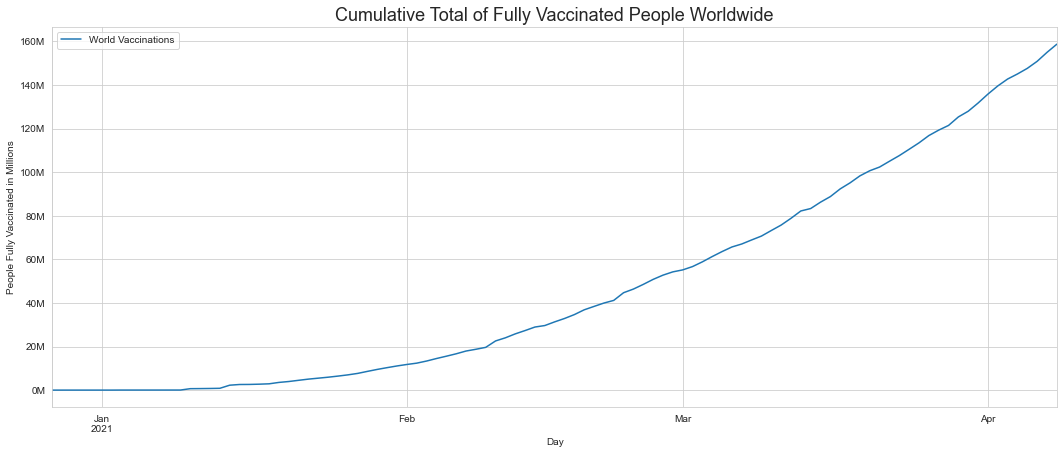

In [16]:
# Change format of y labels to millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
world_df.plot(figsize= (18, 7), ax= ax)
plt.legend(['World Vaccinations'], fancybox= True)
plt.title('Cumulative Total of Fully Vaccinated People Worldwide', fontsize= 18)
plt.ylabel('People Fully Vaccinated in Millions')
plt.show()

### Plots of Fully Vaccinated People

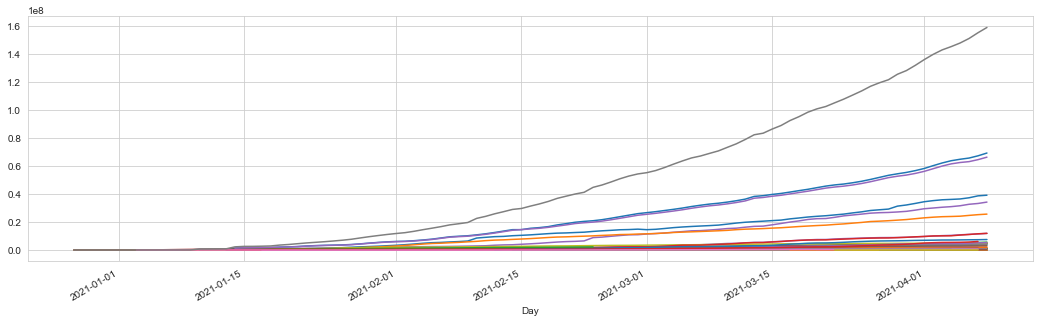

In [17]:
# plot fully vaccinated people in all countries
fig, ax = plt.subplots()
fully_vax_df.groupby('Entity').plot(x= 'Day', y= 'people_fully_vaccinated', 
                                    ax= ax, legend= False, figsize= (18,5));

Not a very helpful plot. Not sure which country is which.

In [18]:
countries_df = fully_vax_df.copy()
countries_df.head()

Entity Code        Day  people_fully_vaccinated
0  Africa  NaN 2021-02-03                        5
1  Africa  NaN 2021-02-04                        5
2  Africa  NaN 2021-02-05                        5
3  Africa  NaN 2021-02-06                     1586
4  Africa  NaN 2021-02-08                     3980

In [19]:
countries_df.sort_values(by= ['people_fully_vaccinated'], 
                         ascending= False, inplace= True)

In [20]:
# which countries do we have?
countries_df.Entity.unique()

array(['World', 'North America', 'United States', 'Europe', 'Asia',
       'European Union', 'India', 'South America', 'Turkey',
       'United Kingdom', 'Brazil', 'Russia', 'England', 'Israel',
       'Germany', 'Indonesia', 'Africa', 'Chile', 'Morocco', 'Italy',
       'France', 'Spain', 'United Arab Emirates', 'Poland', 'Mexico',
       'Romania', 'Serbia', 'Hungary', 'Canada', 'Argentina', 'Greece',
       'Netherlands', 'Czechia', 'Belgium', 'Switzerland', 'Portugal',
       'Austria', 'Sweden', 'Colombia', 'Singapore', 'Scotland', 'Wales',
       'Denmark', 'Japan', 'Azerbaijan', 'Bahrain', 'Malaysia', 'Peru',
       'Norway', 'South Africa', 'Slovakia', 'Ireland', 'Cambodia',
       'Costa Rica', 'Lithuania', 'Northern Ireland', 'Hong Kong',
       'Uruguay', 'Panama', 'Bolivia', 'Slovenia', 'Jordan', 'Ecuador',
       'Bulgaria', 'Dominican Republic', 'Croatia', 'Lebanon', 'Finland',
       'Estonia', 'Malta', 'Thailand', 'South Korea', 'Philippines',
       'Cyprus', 'Northern

In [21]:
# create dataframe with just one day of data
day = countries_df[countries_df['Day'] == '2021-03-20']

# create list of UK countries and filter out everything else
UK_countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']
day = day[day.Entity.isin(UK_countries)]
day.people_fully_vaccinated.sum()

2228772

Not everything in here is a country. Some are continents, there is also the European Union and "World". Let's remove those and get just the countries.

In [22]:
# see if that total matches with the UK # of ppl vaccinated
countries_df[(countries_df['Entity'] == 'United Kingdom') & \
             (countries_df['Day'] == '2021-03-20')]

Entity Code        Day  people_fully_vaccinated
4424  United Kingdom  GBR 2021-03-20                  2228772

So U.K. is just the sum of countries Wales, Northern Ireland, England, and Scotland. We can remove United Kingdom from the analysis to avoid duplication.

In [23]:
# create list of things that are not countries 
continents = ['North America', 'Europe', 'Asia','European Union', 
              'Africa', 'South America', 'World', 'United Kingdom']

In [24]:
countries_df = countries_df[~countries_df['Entity'].isin(continents)]

In [25]:
countries_df.Entity.unique()

array(['United States', 'India', 'Turkey', 'Brazil', 'Russia', 'England',
       'Israel', 'Germany', 'Indonesia', 'Chile', 'Morocco', 'Italy',
       'France', 'Spain', 'United Arab Emirates', 'Poland', 'Mexico',
       'Romania', 'Serbia', 'Hungary', 'Canada', 'Argentina', 'Greece',
       'Netherlands', 'Czechia', 'Belgium', 'Switzerland', 'Portugal',
       'Austria', 'Sweden', 'Colombia', 'Singapore', 'Scotland', 'Wales',
       'Denmark', 'Japan', 'Azerbaijan', 'Bahrain', 'Malaysia', 'Peru',
       'Norway', 'South Africa', 'Slovakia', 'Ireland', 'Cambodia',
       'Costa Rica', 'Lithuania', 'Northern Ireland', 'Hong Kong',
       'Uruguay', 'Panama', 'Bolivia', 'Slovenia', 'Jordan', 'Ecuador',
       'Bulgaria', 'Dominican Republic', 'Croatia', 'Lebanon', 'Finland',
       'Estonia', 'Malta', 'Thailand', 'South Korea', 'Philippines',
       'Cyprus', 'Northern Cyprus', 'Seychelles', 'Kuwait', 'Gibraltar',
       'Luxembourg', 'Iceland', 'Zimbabwe', 'Belarus', 'Latvia',
       'C

In [26]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4010 entries, 4523 to 4340
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   4010 non-null   object        
 1   Code                     3648 non-null   object        
 2   Day                      4010 non-null   datetime64[ns]
 3   people_fully_vaccinated  4010 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 156.6+ KB


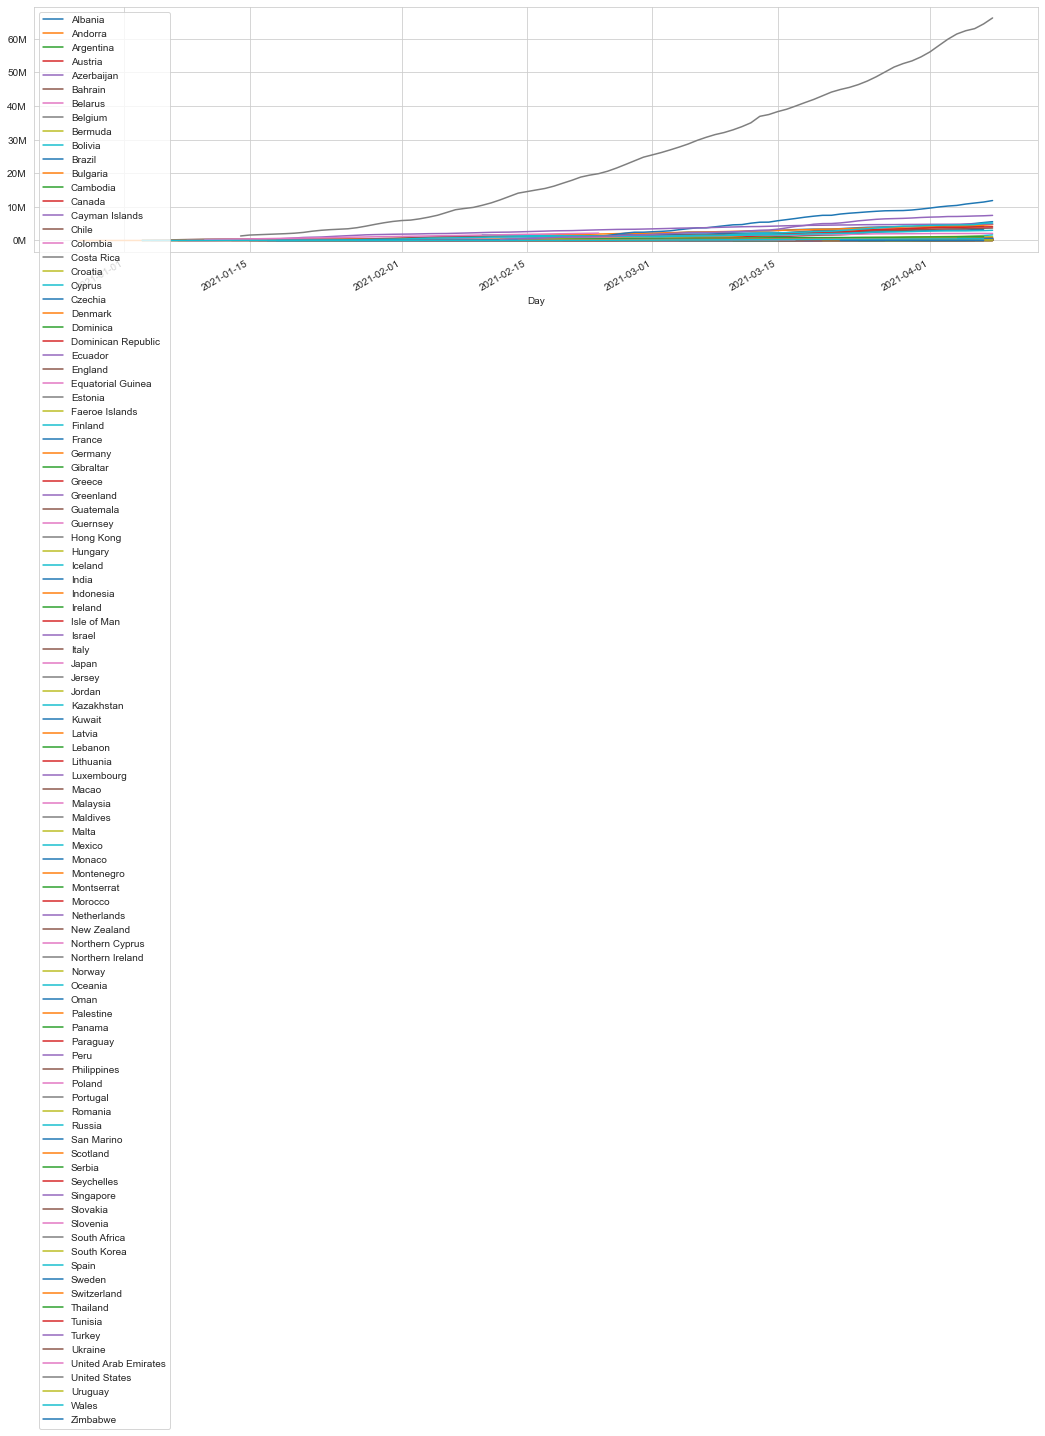

In [27]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in countries_df.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (18,5), label= country);

Still not great. While we can now see the labels, it still is not very clear because there are too many countries. A way to segment them easily that could be useful later would be grouping them by their respective incomes.

To do this, we will need to know which category they are in, provided by the World Bank Group.
For more information on the way countries were classified, visit their [blog post here.](https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2020-2021)

### Segment Data by Country's Income Group

In [28]:
# open file from World Bank that contains data on income classifications
country_incomes = pd.read_csv('../data/list-of-economies.csv', 
                              header= 4, index_col= False)
country_incomes = country_incomes.copy()
country_incomes

Unnamed: 0                                     Economy Code  \
0           1.0                                 Afghanistan  AFG   
1           2.0                                     Albania  ALB   
2           3.0                                     Algeria  DZA   
3           4.0                              American Samoa  ASM   
4           5.0                                     Andorra  AND   
..          ...                                         ...  ...   
261        42.0                          Sub-Saharan Africa  SSF   
262        43.0  Sub-Saharan Africa (excluding high income)  SSA   
263        44.0             Sub-Saharan Africa (IDA & IBRD)  TSS   
264        45.0                         Upper middle income  UMC   
265        46.0                                       World  WLD   

                         Region         Income group Lending category Other  
0                    South Asia           Low income              IDA  HIPC  
1         Europe & Central Asia  Upper middle income             IBRD   NaN  
2    Middle East & North Africa  Lower middle income             IBRD   NaN  
3           East Asia & Pacific  Upper middle income               ..   NaN  
4         Europe & Central Asia          High income               ..   NaN  
..                          ...                  ...              ...   ...  
261                         NaN                  NaN              NaN   NaN  
262                         NaN                  NaN              NaN   NaN  
263                         NaN                  NaN              NaN   NaN  
264                         NaN                  NaN              NaN   NaN  
265                         NaN                  NaN              NaN   NaN  

[266 rows x 7 columns]

In [29]:
# check names of columns
country_incomes.columns

Index(['Unnamed: 0', 'Economy', 'Code', 'Region', 'Income group',
       'Lending category', 'Other'],
      dtype='object')

In [30]:
# check null / NaN values
country_incomes.isna().sum()

Unnamed: 0            2
Economy               2
Code                  2
Region               48
Income group         48
Lending category     48
Other               208
dtype: int64

In [31]:
# drop unnecessary / mostly empty columns
country_incomes.drop(columns= ['Unnamed: 0', 'Other'], inplace= True)
# country_incomes

Bottom of DataFrame seems to be something different than the top of the DataFrame. Let's take a look. Again, all we want to see are the country names.

In [32]:
# see some of the last rows
country_incomes.Economy[210:250]

210                                              Vanuatu
211                                        Venezuela, RB
212                                              Vietnam
213                                Virgin Islands (U.S.)
214                                   West Bank and Gaza
215                                          Yemen, Rep.
216                                               Zambia
217                                             Zimbabwe
218                                                  NaN
219                                                  NaN
220                                           Arab World
221                               Caribbean small states
222                       Central Europe and the Baltics
223                           Early-demographic dividend
224                                  East Asia & Pacific
225          East Asia & Pacific (excluding high income)
226                     East Asia & Pacific (IDA & IBRD)
227                            

It looks like after the last countries there is another table that we do not need. We can remove all of that and only keep the countries and their data.

In [33]:
# subset data and check it worked
country_incomes = country_incomes.iloc[:218]
country_incomes.tail()

Economy Code                      Region  \
213  Virgin Islands (U.S.)  VIR   Latin America & Caribbean   
214     West Bank and Gaza  PSE  Middle East & North Africa   
215            Yemen, Rep.  YEM  Middle East & North Africa   
216                 Zambia  ZMB          Sub-Saharan Africa   
217               Zimbabwe  ZWE          Sub-Saharan Africa   

            Income group Lending category  
213          High income               ..  
214  Lower middle income               ..  
215           Low income              IDA  
216  Lower middle income              IDA  
217  Lower middle income            Blend

In [34]:
country_incomes.Region.value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           38
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [35]:
# merge dataframes
countries_all = pd.merge(countries_df, country_incomes, how= 'left', on= 'Code')
countries_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4010 entries, 0 to 4009
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   4010 non-null   object        
 1   Code                     3648 non-null   object        
 2   Day                      4010 non-null   datetime64[ns]
 3   people_fully_vaccinated  4010 non-null   int64         
 4   Economy                  3624 non-null   object        
 5   Region                   3624 non-null   object        
 6   Income group             3624 non-null   object        
 7   Lending category         3624 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 282.0+ KB


In [36]:
# Income group must be filled in
# See which countries have null income group 
null_vals = countries_all[countries_all.isnull().any(axis= 1)]
null_vals.Entity.unique()

array(['England', 'Scotland', 'Wales', 'Northern Ireland',
       'Northern Cyprus', 'Jersey', 'Oceania', 'Guernsey', 'Montserrat'],
      dtype=object)

Information about how incomes were determined for null value countries can be [found here](https://www.smithsonianmag.com/smart-news/whats-difference-between-england-britain-and-uk-180959558/)

England, Wales, Scotland, and Northern Ireland are all countries within the country of the United Kingdom. 

Bailiwick of Guernsey, Bailiwick of Jersey and Montserrat are all still under some form of British control and are therefore, included in the same classification of U.K. This was double-checked by looking at the classification of similar territories, such as the Isle of Man and the Cayman Islands.

In [37]:
countries_all.loc[countries_all['Entity'] == 'Northern Cyprus', ['Region', 'Income group']] = \
'Europe & Central Asia', 'Upper middle income'

In [38]:
countries_all.loc[countries_all['Entity'] == 'Oceania', ['Region', 'Income group']] = \
'East Asia & Pacific', 'Upper middle income'

In [39]:
# fill remaining null values with "High income" - see above for reasoning
countries_all['Income group'].fillna('High income', inplace= True)
# countries_all.info()

Now let's take a look at how the countries are balanced.

#### Check Balance of Countries in Income Groups

In [40]:
# only going to look at one more recent day
date = countries_all[countries_all['Day'] == '2021-04-08']

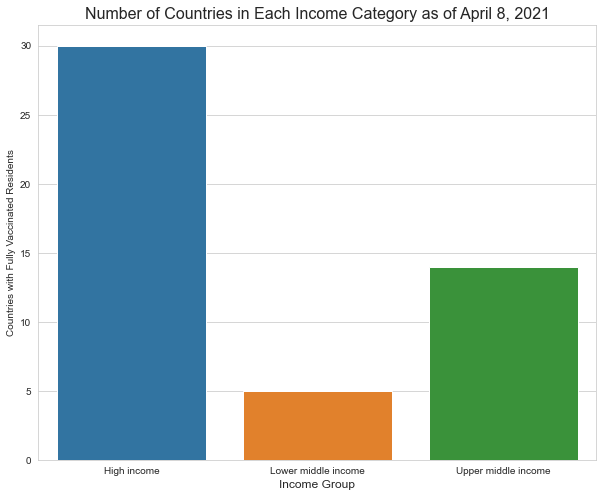

In [41]:
# plot counts
plt.figure(figsize= (10, 8))
sns.countplot(x = 'Income group', data= date)
plt.title('Number of Countries in Each Income Category as of April 8, 2021', fontsize= 16)
plt.ylabel('Countries with Fully Vaccinated Residents')
plt.xlabel('Income Group', fontsize= 12);


#### Inequities of Vaccination Status by Income Group

In [42]:
# get updated data for inequity plot
vaccines_one = pd.read_csv('../data/people-vaccinated-covid.csv')

In [43]:
vaccines_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803 entries, 0 to 6802
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             6803 non-null   object
 1   Code               5741 non-null   object
 2   Day                6803 non-null   object
 3   people_vaccinated  6803 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 212.7+ KB


In [44]:
countries = vaccines_one.Code.unique()
countries

array(['AFG', nan, 'ALB', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BMU', 'BTN', 'BOL', 'BWA', 'BRA', 'BRN', 'BGR', 'KHM', 'CAN',
       'CPV', 'CYM', 'CHL', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE',
       'DNK', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'EST', 'SWZ', 'FRO',
       'FLK', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GUY', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA',
       'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MCO', 'MNE', 'MSR',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NLD', 'NZL', 'NGA', 'MKD', 'OWID_CYN',
       'NOR', 'OMN', 'PAK', 'PSE', 'PAN', 'PNG', 'PRY', 'PER', 'PHL',
       'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'RWA', 'SHN', 'KNA', 'LCA',
     

In [45]:
# create list to hold values of have or have not vaccinated 
vax_vals = []

for i in country_incomes.Code.loc[:]:
    if i in countries:
        vax_vals.append(1)
    else: 
        vax_vals.append(0)

In [46]:
# check to make sure current amount of values are in list
len(vax_vals)

218

In [47]:
# create column with values for each country
country_incomes['Vaccinated'] = vax_vals

<ipython-input-47-687a29a9cd65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_incomes['Vaccinated'] = vax_vals


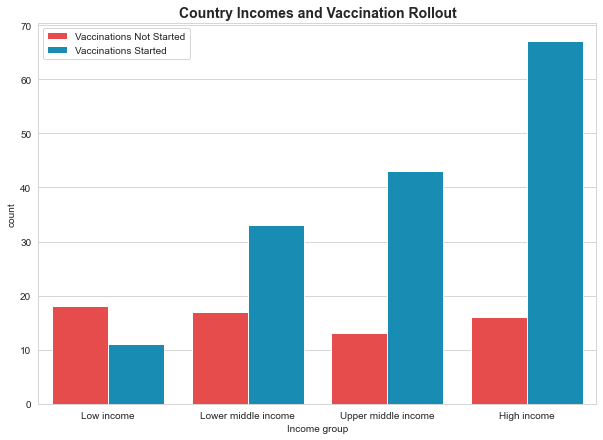

In [48]:
# plot 
order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
colors = ['#ff3333', '#0099cc']

plt.figure(figsize= (10, 7))
sns.countplot(x= 'Income group', data= country_incomes, hue= 'Vaccinated', order= order, palette= colors)
plt.title("Country Incomes and Vaccination Rollout", fontsize= 14, fontweight= 'bold')
plt.legend(labels= ['Vaccinations Not Started', 'Vaccinations Started'], loc= 'upper left');


Here we can see there are a lot more high income countries that have started vaccinations. As the income of the country decreases, the number of countries that have started vaccinating decreases as well.

It will be imperative for wealthier countries to help supply other countries with vaccines if we are to resume international trade and travel.

In [49]:
country_incomes.head()

Economy Code                      Region         Income group  \
0     Afghanistan  AFG                  South Asia           Low income   
1         Albania  ALB       Europe & Central Asia  Upper middle income   
2         Algeria  DZA  Middle East & North Africa  Lower middle income   
3  American Samoa  ASM         East Asia & Pacific  Upper middle income   
4         Andorra  AND       Europe & Central Asia          High income   

  Lending category  Vaccinated  
0              IDA           1  
1             IBRD           1  
2             IBRD           0  
3               ..           0  
4               ..           1

In [50]:
country_incomes[country_incomes['Income group'] == 'Low income']

Economy Code                      Region Income group  \
0                  Afghanistan  AFG                  South Asia   Low income   
30                Burkina Faso  BFA          Sub-Saharan Africa   Low income   
31                     Burundi  BDI          Sub-Saharan Africa   Low income   
37    Central African Republic  CAF          Sub-Saharan Africa   Low income   
38                        Chad  TCD          Sub-Saharan Africa   Low income   
44            Congo, Dem. Rep.  COD          Sub-Saharan Africa   Low income   
61                     Eritrea  ERI          Sub-Saharan Africa   Low income   
64                    Ethiopia  ETH          Sub-Saharan Africa   Low income   
71                 Gambia, The  GMB          Sub-Saharan Africa   Low income   
81                      Guinea  GIN          Sub-Saharan Africa   Low income   
82               Guinea-Bissau  GNB          Sub-Saharan Africa   Low income   
84                       Haiti  HTI   Latin America & Caribbean   Low income   
103  Korea, Dem. People's Rep.  PRK         East Asia & Pacific   Low income   
112                    Liberia  LBR          Sub-Saharan Africa   Low income   
118                 Madagascar  MDG          Sub-Saharan Africa   Low income   
119                     Malawi  MWI          Sub-Saharan Africa   Low income   
122                       Mali  MLI          Sub-Saharan Africa   Low income   
134                 Mozambique  MOZ          Sub-Saharan Africa   Low income   
143                      Niger  NER          Sub-Saharan Africa   Low income   
162                     Rwanda  RWA          Sub-Saharan Africa   Low income   
170               Sierra Leone  SLE          Sub-Saharan Africa   Low income   
176                    Somalia  SOM          Sub-Saharan Africa   Low income   
178                South Sudan  SSD          Sub-Saharan Africa   Low income   
185                      Sudan  SDN          Sub-Saharan Africa   Low income   
189       Syrian Arab Republic  SYR  Middle East & North Africa   Low income   
191                 Tajikistan  TJK       Europe & Central Asia   Low income   
195                       Togo  TGO          Sub-Saharan Africa   Low income   
203                     Uganda  UGA          Sub-Saharan Africa   Low income   
215                Yemen, Rep.  YEM  Middle East & North Africa   Low income   

    Lending category  Vaccinated  
0                IDA           1  
30               IDA           0  
31               IDA           0  
37               IDA           0  
38               IDA           0  
44               IDA           0  
61               IDA           0  
64               IDA           0  
71               IDA           1  
81               IDA           0  
82               IDA           0  
84               IDA           0  
103               ..           0  
112              IDA           0  
118              IDA           0  
119              IDA           1  
122              IDA           1  
134              IDA           1  
143              IDA           0  
162              IDA           1  
170              IDA           1  
176              IDA           0  
178              IDA           0  
185              IDA           1  
189              IDA           1  
191              IDA           0  
195              IDA           1  
203              IDA           1  
215              IDA           0

In [51]:
country_incomes.groupby('Income group')['Vaccinated'].value_counts(normalize= True)

Income group         Vaccinated
High income          1             0.807229
                     0             0.192771
Low income           0             0.620690
                     1             0.379310
Lower middle income  1             0.660000
                     0             0.340000
Upper middle income  1             0.767857
                     0             0.232143
Name: Vaccinated, dtype: float64

In [52]:
country_incomes['Vaccinated'].value_counts()

1    154
0     64
Name: Vaccinated, dtype: int64

#### Inspect Incomes Separately

In [53]:
high_inc = countries_all[countries_all['Income group'] == 'High income']

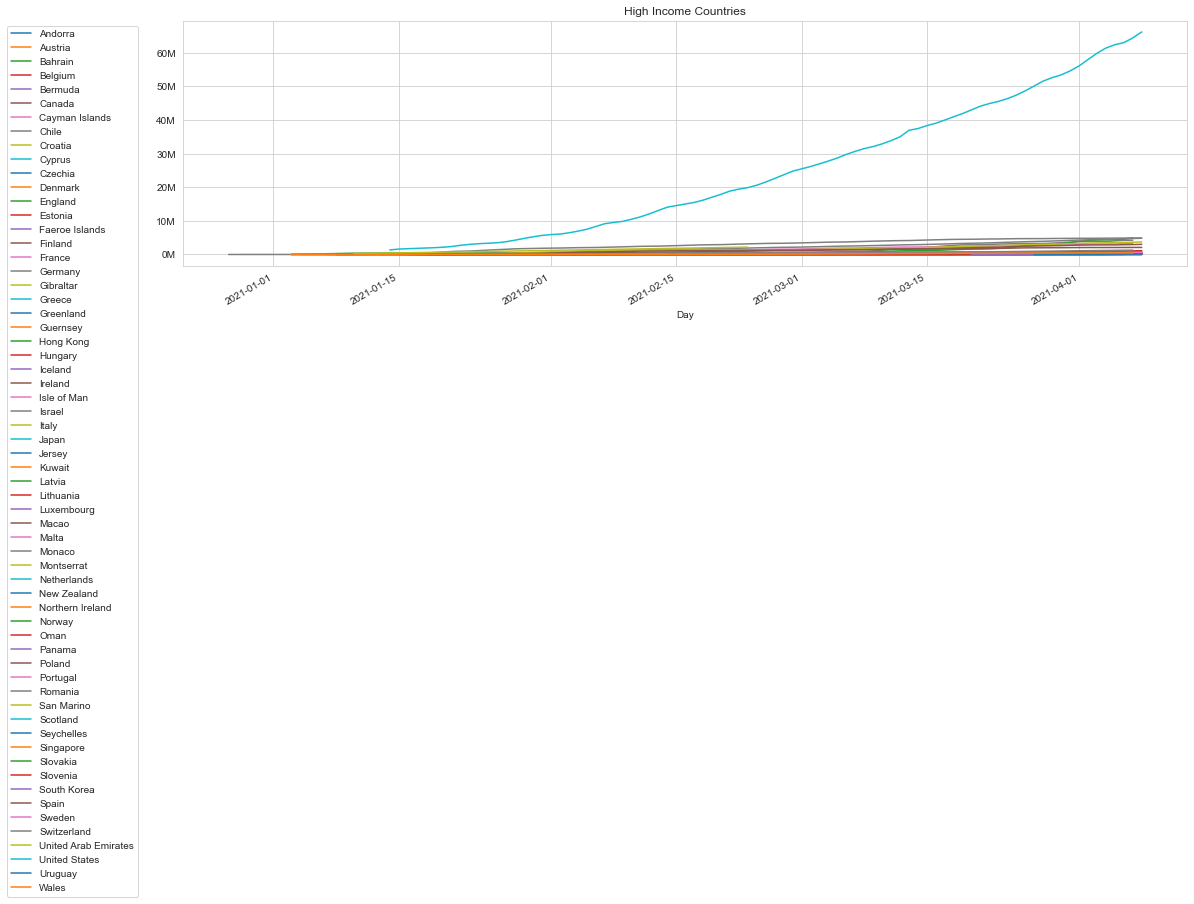

In [54]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in high_inc.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (18,5), label= country)
    
plt.title('High Income Countries')
plt.legend(loc = 'upper left', bbox_to_anchor = [-.18, 1]);

In [55]:
up_mid = countries_all[countries_all['Income group'] == 'Upper middle income']

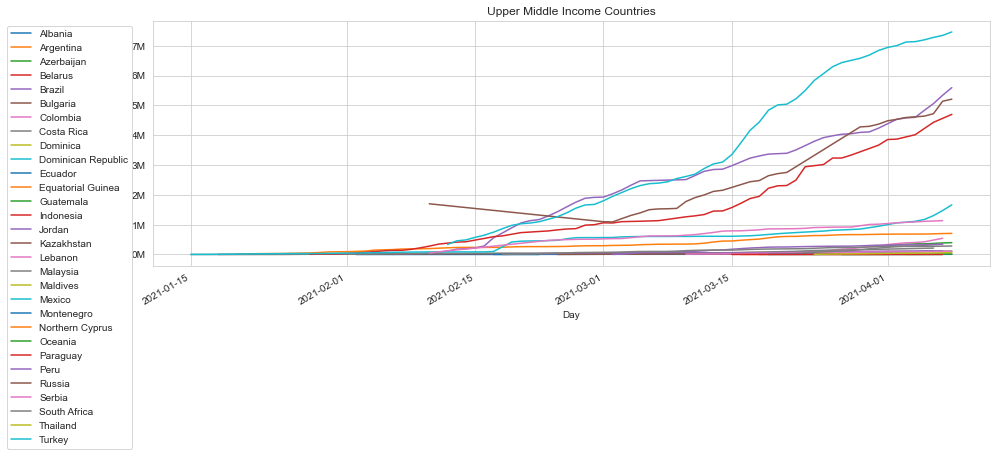

In [56]:
# plot vaccinations by income group
# Change format of y labels to millions
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in up_mid.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (15,5), label= country)
    
plt.title('Upper Middle Income Countries')
plt.legend(loc = 'upper left', bbox_to_anchor = [-.18, 1]);

In [57]:
low_mid = countries_all[countries_all['Income group'] == 'Lower middle income']

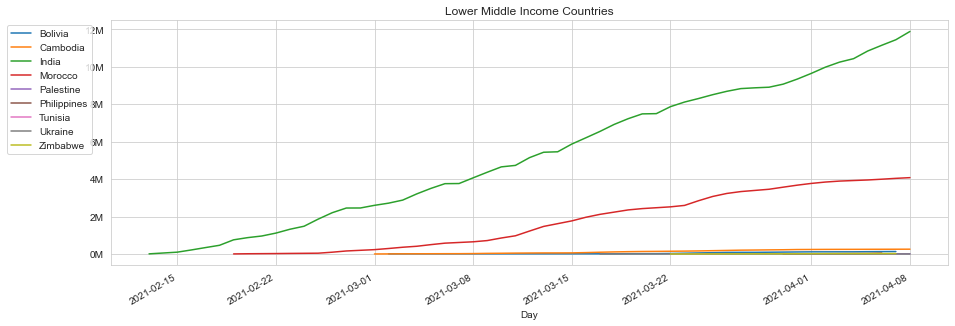

In [58]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in low_mid.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (15,5), label= country)
    
plt.title('Lower Middle Income Countries')
plt.legend(loc = 'upper left', bbox_to_anchor = [-.13, 1]);

We can see from the three plots that 
* most high income countries started recording fully vaccinated people in January
* Upper middle income countries had fully vaccinated people mid-January, but most saw progress start in February
* Lower middle income countries had fully vaccinated people starting mid-February. Two of the countries didn't have any until March, and their rates are not rising as rapidly as other countries.

In [59]:
low_mid.groupby('Entity')['people_fully_vaccinated'].max()

Entity
Bolivia          132692
Cambodia         257434
India          11877740
Morocco         4075290
Palestine         11748
Philippines       50685
Tunisia            3988
Ukraine               5
Zimbabwe          26179
Name: people_fully_vaccinated, dtype: int64

I am unsure if the numbers for Ukraine are accurate or not, but some research suggests they might be.

Read [this article in The New York Times](https://www.nytimes.com/2021/03/11/world/ukraine-covid-vaccine-misinformation.html) for more information on why Ukraine's numbers are so low. The number of individuals getting vaccinated is on the rise. May not see an uptick until people start getting their second doses.

The low income countries have started so recently that they do not have any fully vaccinated residents.

#### Fully Vaccinated People by Country

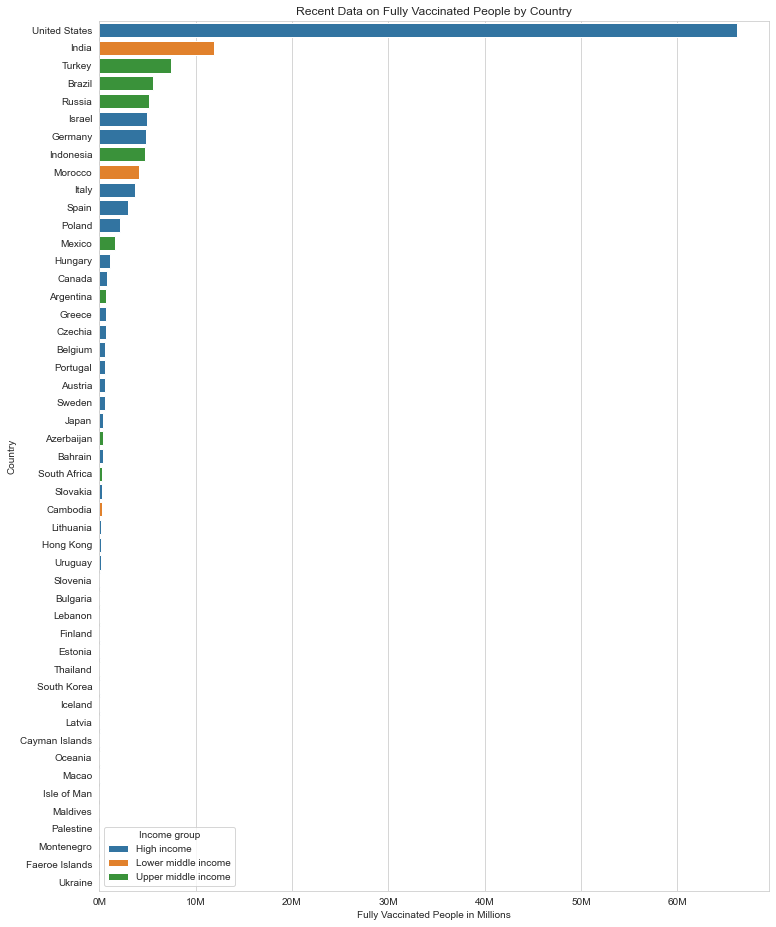

In [60]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots(figsize= (12, 16))
ax.xaxis.set_major_formatter(formatter)

# plot fully vaccinated people by country
# plt.figure(figsize= (12, 16))
sns.barplot(data= date, y= 'Entity', x= 'people_fully_vaccinated', 
            hue= 'Income group', dodge= False)
plt.title('Recent Data on Fully Vaccinated People by Country')
plt.ylabel('Country')
plt.xlabel('Fully Vaccinated People in Millions');

The United States is vaccinating A LOT of individuals. We can't really see what is going on with the other countries, so let's zoom in and see how they're doing.

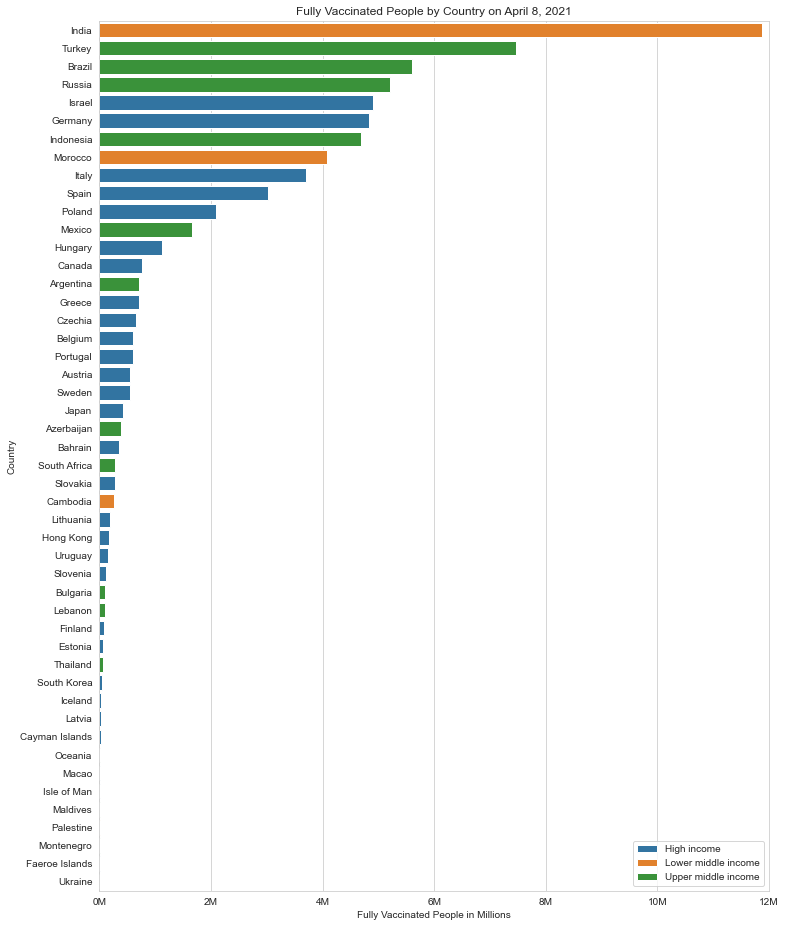

In [61]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots(figsize= (12, 16))
ax.xaxis.set_major_formatter(formatter)

# plot fully vaccinated people by country
# plt.figure(figsize= (12, 16))
sns.barplot(data= date, y= 'Entity', x= 'people_fully_vaccinated', 
            hue= 'Income group', dodge= False, order= date.Entity.iloc[1:])
plt.title('Fully Vaccinated People by Country on April 8, 2021')
plt.ylabel('Country')
plt.xlabel('Fully Vaccinated People in Millions')
plt.xlim(0, 12000000)
plt.legend(loc= 'lower right');

### Percent of Population Data

In [62]:
df = pd.read_csv('../data/new_owid-covid-data.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80986 entries, 0 to 80985
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               80986 non-null  object 
 1   continent                              77046 non-null  object 
 2   location                               80986 non-null  object 
 3   date                                   80986 non-null  object 
 4   total_cases                            79291 non-null  float64
 5   new_cases                              79289 non-null  float64
 6   new_cases_smoothed                     78288 non-null  float64
 7   total_deaths                           69788 non-null  float64
 8   new_deaths                             69946 non-null  float64
 9   new_deaths_smoothed                    78288 non-null  float64
 10  total_cases_per_million                78861 non-null  float64
 11  ne

In [64]:
df.date.max()

'2021-04-11'

In [69]:
temp_df = df.loc[df['date'] == '2021-04-10']
one_day_df = temp_df.copy()

In [70]:
# create column of percent of population that is fully vaccinated
one_day_df['pop_vax_percent'] = round(one_day_df['people_fully_vaccinated']\
                                      / one_day_df['population'] *100, 2)

one_day_df = one_day_df.sort_values(by= ['pop_vax_percent', 'location'], 
                                    ascending= False)[:35]

In [71]:
one_day_df.head()

iso_code      continent    location        date  total_cases  new_cases  \
29007      GIB         Europe   Gibraltar  2021-04-10          NaN        NaN   
36284      ISR           Asia      Israel  2021-04-10     835813.0      139.0   
15317      CHL  South America       Chile  2021-04-10    1068522.0     8101.0   
62597      SMR         Europe  San Marino  2021-04-10       4956.0       12.0   
6278       BHR           Asia     Bahrain  2021-04-10     155402.0     1122.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
29007                 NaN           NaN         NaN                  NaN  ...   
36284             249.000        6292.0        12.0                8.000  ...   
15317            7006.286       24213.0       105.0               98.429  ...   
62597              25.857          85.0         0.0                0.143  ...   
6278             1090.286         554.0         4.0                3.286  ...   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
29007              NaN                    NaN                  NaN   
36284              0.5                 93.320                 6.74   
15317              1.3                127.993                 8.46   
62597              NaN                    NaN                 5.64   
6278               NaN                151.689                16.52   

       female_smokers  male_smokers  handwashing_facilities  \
29007             NaN           NaN                     NaN   
36284            15.4          35.4                     NaN   
15317            34.2          41.5                     NaN   
62597             NaN           NaN                     NaN   
6278              5.8          37.6                     NaN   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
29007                         NaN            79.93                      NaN   
36284                        2.99            82.97                    0.919   
15317                        2.11            80.18                    0.851   
62597                        3.80            84.97                      NaN   
6278                         2.00            77.29                    0.852   

       pop_vax_percent  
29007            88.13  
36284            56.87  
15317            24.39  
62597            22.69  
6278             22.14  

[5 rows x 60 columns]

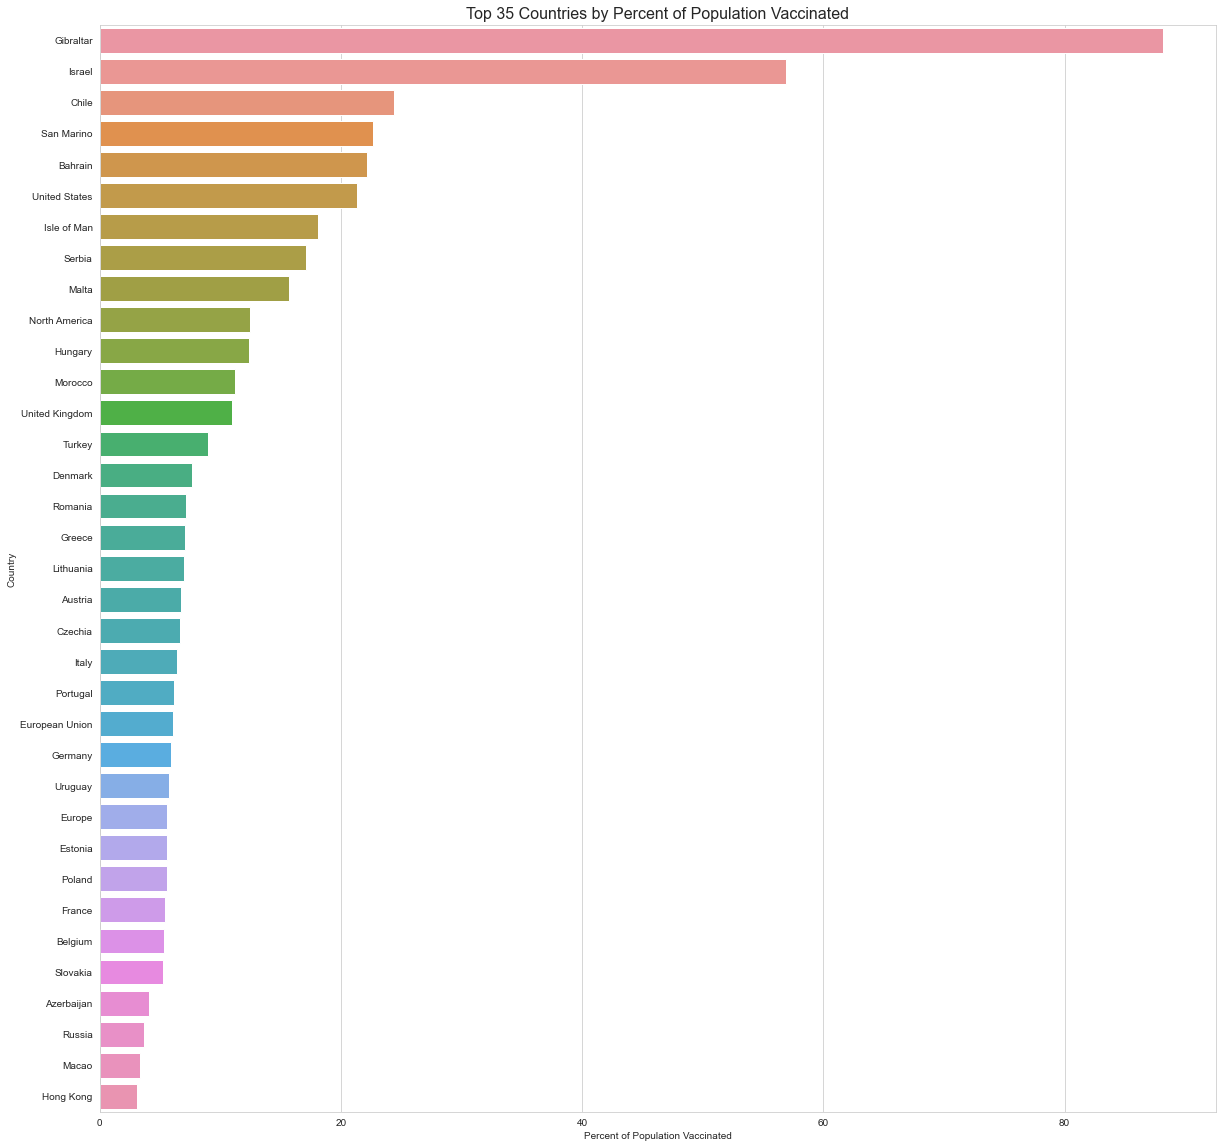

In [72]:
# plot to show percent of vaccinations
plt.figure(figsize= (20, 20))
sns.barplot(x = 'pop_vax_percent', y= 'location', data= one_day_df)
plt.title('Top 35 Countries by Percent of Population Vaccinated', fontsize= 16)
plt.xlabel('Percent of Population Vaccinated')
plt.ylabel('Country');

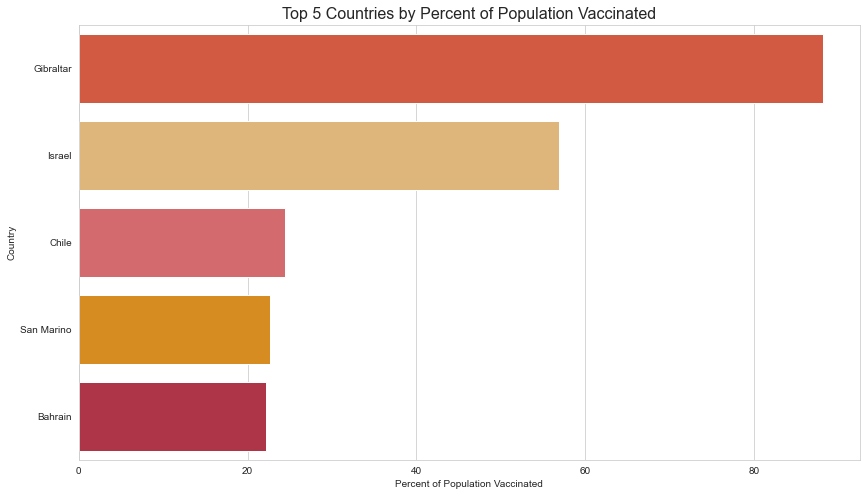

In [73]:
# plot to show percent of vaccinations
colors = ['#ea4a2a', '#efb86a', '#e4585d', '#f49103', '#c2213a']

plt.figure(figsize= (14, 8))
sns.set_context(rc= {'figure.facecolor' : '##e9e9e9'})
sns.barplot(x = 'pop_vax_percent', y= 'location', data= one_day_df[:5], palette= colors, )
plt.title('Top 5 Countries by Percent of Population Vaccinated', fontsize= 16)
plt.xlabel('Percent of Population Vaccinated')
plt.ylabel('Country');

Gibraltar is leading the way with over 85% of it's residents being fully vaccinated. 
[This article](https://www.washingtonpost.com/world/2021/03/18/gibraltar-vaccine-coronavirus/) discusses how Gibraltar has finished administering vaccines to all adults that want one. 

Areas that are high on the list have a small population or vaccines readily accessible. Gibraltar has both a smaller population and access to vaccines from Britain.

## Updated data

In [3]:
new_df = pd.read_csv('../data/6-1-people-fully-vaccinated-covid.csv')

In [4]:
new_df

Entity Code         Day  people_fully_vaccinated
0      Afghanistan  AFG  2021-05-11                    55624
1      Afghanistan  AFG  2021-05-20                    77560
2      Afghanistan  AFG  2021-05-24                    96910
3      Afghanistan  AFG  2021-05-26                   111082
4      Afghanistan  AFG  2021-05-27                   113739
...            ...  ...         ...                      ...
10548     Zimbabwe  ZWE  2021-05-27                   305268
10549     Zimbabwe  ZWE  2021-05-28                   320166
10550     Zimbabwe  ZWE  2021-05-29                   335679
10551     Zimbabwe  ZWE  2021-05-30                   341218
10552     Zimbabwe  ZWE  2021-05-31                   344400

[10553 rows x 4 columns]

In [5]:
new_df.Day.max()

'2021-05-31'

In [6]:
day_df = new_df[new_df['Day'] == '2021-05-31']

In [7]:
day_df.sort_values(by= 'people_fully_vaccinated', ascending= False).head(15)

Entity      Code         Day  people_fully_vaccinated
10472                World  OWID_WRL  2021-05-31                430361678
4097           High income       NaN  2021-05-31                275700208
6889         North America       NaN  2021-05-31                152878441
2931                Europe       NaN  2021-05-31                123918290
486                   Asia       NaN  2021-05-31                104895621
10094  Upper middle income       NaN  2021-05-31                 88918704
3087        European Union       NaN  2021-05-31                 80551898
5816   Lower middle income       NaN  2021-05-31                 65271869
4481                 India       IND  2021-05-31                 43258810
9016         South America       NaN  2021-05-31                 39454256
1215                Brazil       BRA  2021-05-31                 22106516
9602                Turkey       TUR  2021-05-31                 12542712
6334                Mexico       MEX  2021-05-31                 12415247
5051                 Italy       ITA  2021-05-31                 12077591
8148                Russia       RUS  2021-05-31                 11925267

I did not remove the World, continents, groups of countries, or income groups. Let's look at the income groups before removing them to examine the countries with the most vaccinations.

In [8]:
income_df = day_df[day_df['Entity'].str.contains('income')]

In [9]:
income_df

Entity Code         Day  people_fully_vaccinated
4097           High income  NaN  2021-05-31                275700208
5708            Low income  NaN  2021-05-31                   469232
5816   Lower middle income  NaN  2021-05-31                 65271869
10094  Upper middle income  NaN  2021-05-31                 88918704

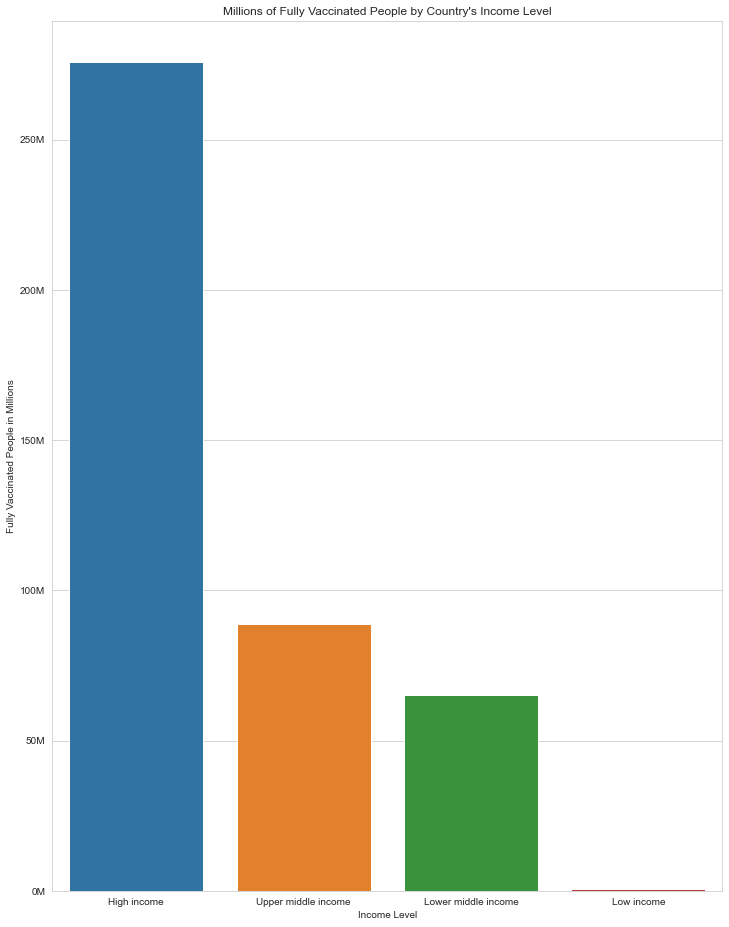

In [10]:
# Change format of y labels to millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots(figsize= (12, 16))
ax.yaxis.set_major_formatter(formatter)

#plot fully vaccinated people by country's income level
order = ('High income', 'Upper middle income', 'Lower middle income', 'Low income')
sns.barplot(data= income_df, x= 'Entity', y= 'people_fully_vaccinated', order= order)
plt.xlabel('Income Level')
plt.ylabel('Fully Vaccinated People in Millions')
plt.title("Millions of Fully Vaccinated People by Country's Income Level");

Unfortunately, we cannot see which countries are in which income level. However, it is very apparent that higher income countries are much farther ahead than lower and low income countries.

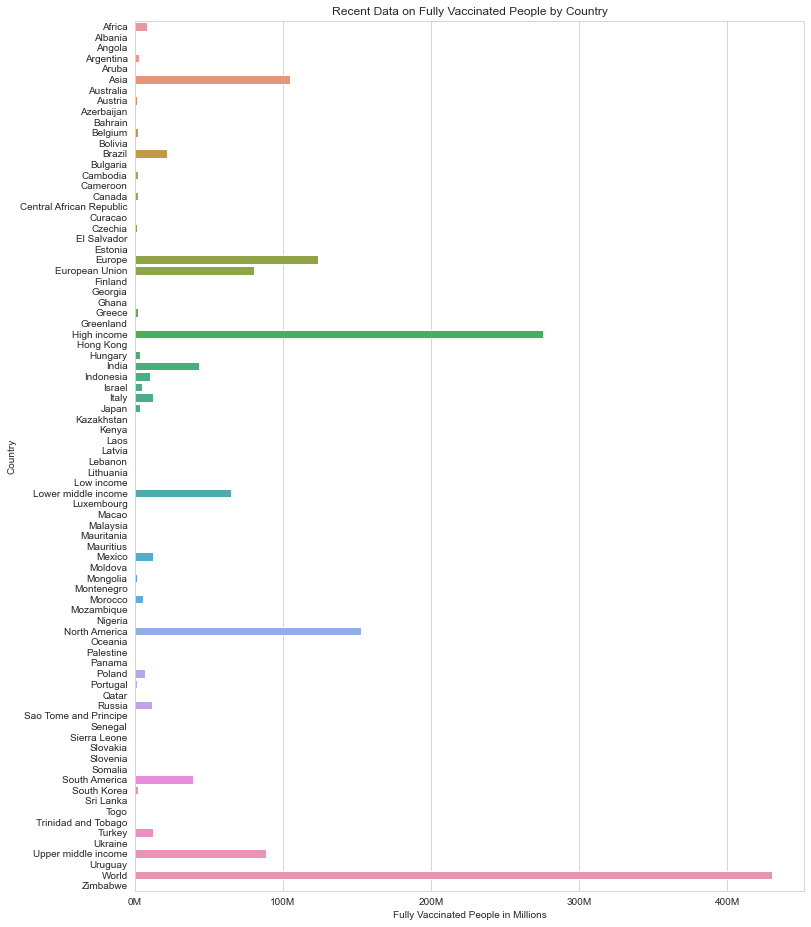

In [12]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots(figsize= (12, 16))
ax.xaxis.set_major_formatter(formatter)

# plot fully vaccinated people by country
# plt.figure(figsize= (12, 16))
sns.barplot(data= day_df, y= 'Entity', x= 'people_fully_vaccinated')
plt.title('Recent Data on Fully Vaccinated People by Country')
plt.ylabel('Country')
plt.xlabel('Fully Vaccinated People in Millions');

In [14]:
# create list of things that are not countries 
remove_list = ['North America', 'Europe', 'Asia','European Union', 
               'Africa', 'South America', 'World', 'United Kingdom', 
               'High income', 'Upper middle income', 'Lower middle income', 
               'Low income']
day_df = day_df[~day_df['Entity'].isin(remove_list)]

In [21]:
day_df.sort_values(by= 'people_fully_vaccinated', ascending= False)

Entity Code         Day  people_fully_vaccinated
4097               High income  NaN  2021-05-31                275700208
4481                     India  IND  2021-05-31                 43258810
1215                    Brazil  BRA  2021-05-31                 22106516
9602                    Turkey  TUR  2021-05-31                 12542712
6334                    Mexico  MEX  2021-05-31                 12415247
...                        ...  ...         ...                      ...
8205     Sao Tome and Principe  STP  2021-05-31                     6514
8818                   Somalia  SOM  2021-05-31                     4714
9448       Trinidad and Tobago  TTO  2021-05-31                     1179
1641  Central African Republic  CAF  2021-05-31                      717
5168                     Kenya  KEN  2021-05-31                      203

[72 rows x 4 columns]

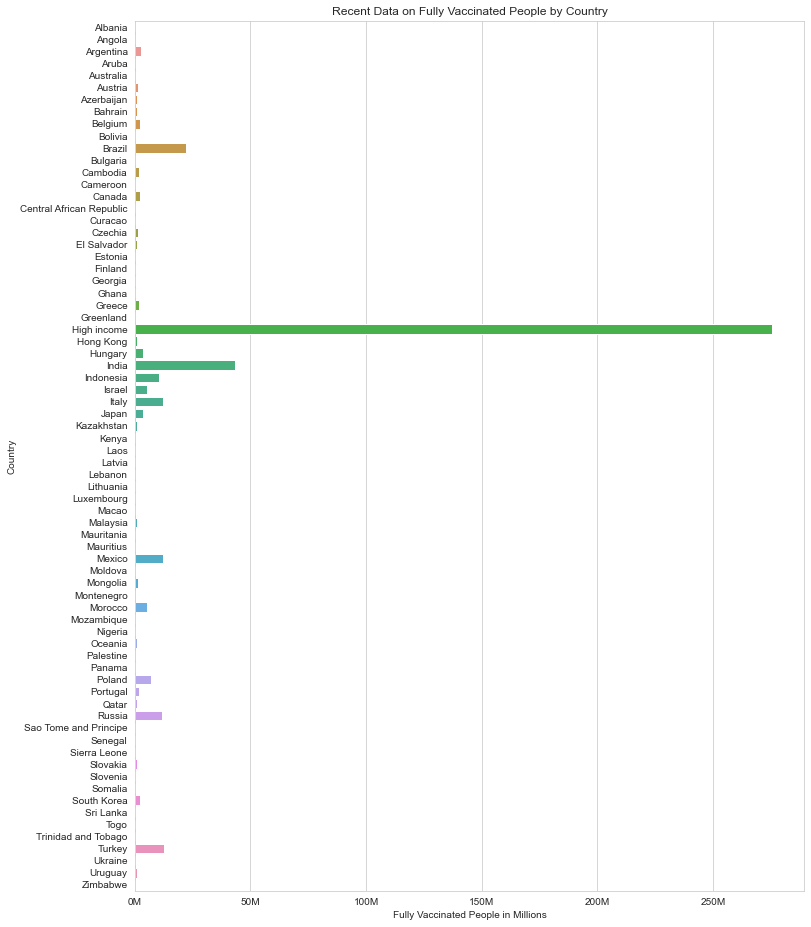

In [22]:
# Change format of y labels to millions
formatter = FuncFormatter(millions)

# plot World vaccinations
fig, ax = plt.subplots(figsize= (12, 16))
ax.xaxis.set_major_formatter(formatter)

# plot fully vaccinated people by country
# plt.figure(figsize= (12, 16))
sns.barplot(data= day_df, y= 'Entity', x= 'people_fully_vaccinated')
plt.title('Recent Data on Fully Vaccinated People by Country')
plt.ylabel('Country')
plt.xlabel('Fully Vaccinated People in Millions');

In [ ]:
#add percent of population and analyze
#evaluate income levels again, 
#evaluate how trend has changed over time - still increasing at same rate or slowing down?

# Market Segmentation with Worldwide COVID-19 Vaccinations

## Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_columns', None)

## Data Loading and Cleaning

In [75]:
data = pd.read_csv('../data/vaccinations_all.csv')

In [76]:
data.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
0                                  NaN                             NaN  
1                                  NaN                            35.0  
2                                  NaN                            35.0  
3                                  NaN                            35.0  
4                                  NaN                            35.0

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             10782 non-null  object 
 1   iso_code                             10782 non-null  object 
 2   date                                 10782 non-null  object 
 3   total_vaccinations                   6807 non-null   float64
 4   people_vaccinated                    6183 non-null   float64
 5   people_fully_vaccinated              4448 non-null   float64
 6   daily_vaccinations_raw               5806 non-null   float64
 7   daily_vaccinations                   10591 non-null  float64
 8   total_vaccinations_per_hundred       6807 non-null   float64
 9   people_vaccinated_per_hundred        6183 non-null   float64
 10  people_fully_vaccinated_per_hundred  4448 non-null   float64
 11  daily_vaccinations_per_milli

In [78]:
data.isnull().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                     3975
people_vaccinated                      4599
people_fully_vaccinated                6334
daily_vaccinations_raw                 4976
daily_vaccinations                      191
total_vaccinations_per_hundred         3975
people_vaccinated_per_hundred          4599
people_fully_vaccinated_per_hundred    6334
daily_vaccinations_per_million          191
dtype: int64

In [79]:
#remove continents
# we are removing the countries and keeping the UK so we can map it later
continents = ['North America', 'Europe', 'Asia','European Union', 
              'Africa', 'South America', 'World', 'England',
              'Northern Ireland','Scotland', 'Wales']

data = data[~data['location'].isin(continents)]

In [80]:
data.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica',
       'Japan

In [81]:
# drop columns that have been 'smoothed' or have some kind of calculation using 'per'
cols = [data.drop(columns= i, inplace= True) for i in data.columns if 'per' in i]

In [82]:
# fill null values with 0
data.fillna(0, inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9587 entries, 0 to 10781
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 9587 non-null   object 
 1   iso_code                 9587 non-null   object 
 2   date                     9587 non-null   object 
 3   total_vaccinations       9587 non-null   float64
 4   people_vaccinated        9587 non-null   float64
 5   people_fully_vaccinated  9587 non-null   float64
 6   daily_vaccinations_raw   9587 non-null   float64
 7   daily_vaccinations       9587 non-null   float64
dtypes: float64(5), object(3)
memory usage: 674.1+ KB


### Add Country Income Data

In [83]:
# open file from World Bank that contains data on income classifications
country_incomes = pd.read_csv('../data/list-of-economies.csv', 
                              header= 4, index_col= False)
country_incomes

Unnamed: 0                                     Economy Code  \
0           1.0                                 Afghanistan  AFG   
1           2.0                                     Albania  ALB   
2           3.0                                     Algeria  DZA   
3           4.0                              American Samoa  ASM   
4           5.0                                     Andorra  AND   
..          ...                                         ...  ...   
261        42.0                          Sub-Saharan Africa  SSF   
262        43.0  Sub-Saharan Africa (excluding high income)  SSA   
263        44.0             Sub-Saharan Africa (IDA & IBRD)  TSS   
264        45.0                         Upper middle income  UMC   
265        46.0                                       World  WLD   

                         Region         Income group Lending category Other  
0                    South Asia           Low income              IDA  HIPC  
1         Europe & Central Asia  Upper middle income             IBRD   NaN  
2    Middle East & North Africa  Lower middle income             IBRD   NaN  
3           East Asia & Pacific  Upper middle income               ..   NaN  
4         Europe & Central Asia          High income               ..   NaN  
..                          ...                  ...              ...   ...  
261                         NaN                  NaN              NaN   NaN  
262                         NaN                  NaN              NaN   NaN  
263                         NaN                  NaN              NaN   NaN  
264                         NaN                  NaN              NaN   NaN  
265                         NaN                  NaN              NaN   NaN  

[266 rows x 7 columns]

In [84]:
# drop unnecessary / mostly empty columns
country_incomes.drop(columns= ['Unnamed: 0', 'Other', 'Lending category'], inplace= True)

In [85]:
# subset data and check it worked
country_incomes = country_incomes.iloc[:218]
country_incomes.tail()

Economy Code                      Region  \
213  Virgin Islands (U.S.)  VIR   Latin America & Caribbean   
214     West Bank and Gaza  PSE  Middle East & North Africa   
215            Yemen, Rep.  YEM  Middle East & North Africa   
216                 Zambia  ZMB          Sub-Saharan Africa   
217               Zimbabwe  ZWE          Sub-Saharan Africa   

            Income group  
213          High income  
214  Lower middle income  
215           Low income  
216  Lower middle income  
217  Lower middle income

In [86]:
country_incomes.Region.value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           38
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [87]:
country_incomes.isnull().sum()

Economy         0
Code            0
Region          0
Income group    0
dtype: int64

In [88]:
# merge dataframes
df = pd.merge(data, country_incomes, how= 'left', left_on= 'iso_code', right_on= 'Code')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9587 entries, 0 to 9586
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 9587 non-null   object 
 1   iso_code                 9587 non-null   object 
 2   date                     9587 non-null   object 
 3   total_vaccinations       9587 non-null   float64
 4   people_vaccinated        9587 non-null   float64
 5   people_fully_vaccinated  9587 non-null   float64
 6   daily_vaccinations_raw   9587 non-null   float64
 7   daily_vaccinations       9587 non-null   float64
 8   Economy                  9158 non-null   object 
 9   Code                     9158 non-null   object 
 10  Region                   9158 non-null   object 
 11  Income group             9158 non-null   object 
dtypes: float64(5), object(7)
memory usage: 973.7+ KB


In [89]:
# Income group must be filled in
# See which countries have null income group 
null_vals = df[df.isnull().any(axis= 1)]
null_vals.location.unique()

array(['Anguilla', 'Falkland Islands', 'Guernsey', 'Jersey', 'Kosovo',
       'Montserrat', 'Northern Cyprus', 'Oceania', 'Saint Helena'],
      dtype=object)

Research if Australia and Oceania have the same stats.

In [90]:
day = df[df['date'] == '2021-04-05']

In [91]:
df[(df['location'] == 'Oceania') & \
             (df['date'] == '2021-04-05')]

location  iso_code        date  total_vaccinations  people_vaccinated  \
6646  Oceania  OWID_OCE  2021-04-05            912975.0           211477.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
6646                  16483.0                  1127.0             47102.0   

     Economy Code Region Income group  
6646     NaN  NaN    NaN          NaN

In [92]:
df[(df['location'] == 'Australia') & \
             (df['date'] == '2021-04-05')]

location iso_code        date  total_vaccinations  people_vaccinated  \
459  Australia      AUS  2021-04-05            844309.0                0.0   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
459                      0.0                  1127.0             43221.0   

       Economy Code               Region Income group  
459  Australia  AUS  East Asia & Pacific  High income

From this, we see that Australia is collecting it's own stats that are combined with other countries to form Oceania.

The 14 countries within Oceania are listed in the income csv, but range from Solomon Islands and Papua New Guinea as lower middle, Fiji and Samoa as upper middle, and New Zealand and Australia as high.

Most of the countries are labeled 'Upper middle income', so we will replace the Income group with that.

In [93]:
# replace null values with correct values
df.loc[df['location'] == 'Oceania', ['Region', 'Income group']] = \
'East Asia & Pacific', 'Upper middle income'

In [94]:
df[df['location'] == 'Oceania'][:5]

location  iso_code        date  total_vaccinations  people_vaccinated  \
6597  Oceania  OWID_OCE  2021-02-15                 0.0                0.0   
6598  Oceania  OWID_OCE  2021-02-16                 0.0                0.0   
6599  Oceania  OWID_OCE  2021-02-17                 0.0                0.0   
6600  Oceania  OWID_OCE  2021-02-18                 0.0                0.0   
6601  Oceania  OWID_OCE  2021-02-19                30.0               30.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
6597                      0.0                     0.0                 0.0   
6598                      0.0                     0.0                 0.0   
6599                      0.0                     0.0                 0.0   
6600                      0.0                     0.0                 0.0   
6601                      0.0                    30.0                 8.0   

     Economy Code               Region         Income group  
6597     NaN  NaN  East Asia & Pacific  Upper middle income  
6598     NaN  NaN  East Asia & Pacific  Upper middle income  
6599     NaN  NaN  East Asia & Pacific  Upper middle income  
6600     NaN  NaN  East Asia & Pacific  Upper middle income  
6601     NaN  NaN  East Asia & Pacific  Upper middle income

Fill in Kosovo with it's respective stats and Northern Cyprus with Turkey's stats

In [95]:
df.loc[df['location'] == 'Northern Cyprus', ['Region', 'Income group']] = \
'Europe & Central Asia', 'Upper middle income'

In [96]:
df.loc[df['location'] == 'Kosovo', ['Region', 'Income group', 'iso_code']] = \
'Europe & Central Asia', 'Upper middle income', 'KSV'

The rest of the countries are territories that belong to the UK. We will fill the stats in with UK information. See the EDA notebook for more information on the reasoning behind this.

In [97]:
df['Income group'].fillna('High income', inplace= True)
df['Region'].fillna('Europe & Central Asia', inplace= True)

In [98]:
df.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BMU', 'BTN', 'BOL', 'BRA', 'BRN', 'BGR', 'KHM', 'CAN', 'CPV',
       'CYM', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE',
       'DNK', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'EST', 'FRO',
       'FLK', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GUY', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KSV', 'KWT',
       'LAO', 'LVA', 'LBN', 'LIE', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MCO', 'MNG',
       'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL',
       'NGA', 'MKD', 'OWID_CYN', 'NOR', 'OWID_OCE', 'OMN', 'PAK', 'PSE',
       'PAN', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS',
       'RWA', 'SH

The data source made up some codes that don't actually exist. To prevent any slip-ups, let's remove the "OWID_" so all entries have 3-letter codes.

In [99]:
df['iso_code'] = df['iso_code'].str.replace('OWID_', '')

In [100]:
df.drop(['Economy', 'Code'], axis= 1, inplace= True)

In [101]:
df[df.location == 'Kosovo']

location iso_code        date  total_vaccinations  people_vaccinated  \
4931   Kosovo      KSV  2021-03-28                 0.0                0.0   
4932   Kosovo      KSV  2021-03-29                 0.0                0.0   
4933   Kosovo      KSV  2021-03-30                 0.0                0.0   
4934   Kosovo      KSV  2021-03-31                 0.0                0.0   
4935   Kosovo      KSV  2021-04-01                 0.0                0.0   
4936   Kosovo      KSV  2021-04-02                 0.0                0.0   
4937   Kosovo      KSV  2021-04-03               700.0              700.0   
4938   Kosovo      KSV  2021-04-04              2500.0             2500.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
4931                      0.0                     0.0                 0.0   
4932                      0.0                     0.0               117.0   
4933                      0.0                     0.0               117.0   
4934                      0.0                     0.0               117.0   
4935                      0.0                     0.0               117.0   
4936                      0.0                     0.0               117.0   
4937                      0.0                     0.0               117.0   
4938                      0.0                  1800.0               357.0   

                     Region         Income group  
4931  Europe & Central Asia  Upper middle income  
4932  Europe & Central Asia  Upper middle income  
4933  Europe & Central Asia  Upper middle income  
4934  Europe & Central Asia  Upper middle income  
4935  Europe & Central Asia  Upper middle income  
4936  Europe & Central Asia  Upper middle income  
4937  Europe & Central Asia  Upper middle income  
4938  Europe & Central Asia  Upper middle income

In [102]:
df.isnull().sum()

location                   0
iso_code                   0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
daily_vaccinations_raw     0
daily_vaccinations         0
Region                     0
Income group               0
dtype: int64

## PCA, K-Means, and Hierarchical Agglomerative Clustering

<AxesSubplot:>

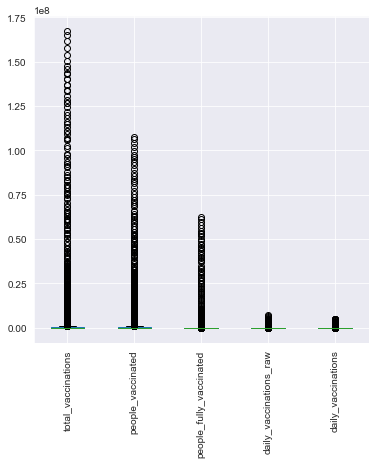

In [103]:
df.boxplot(figsize= (6,6), rot= 90)

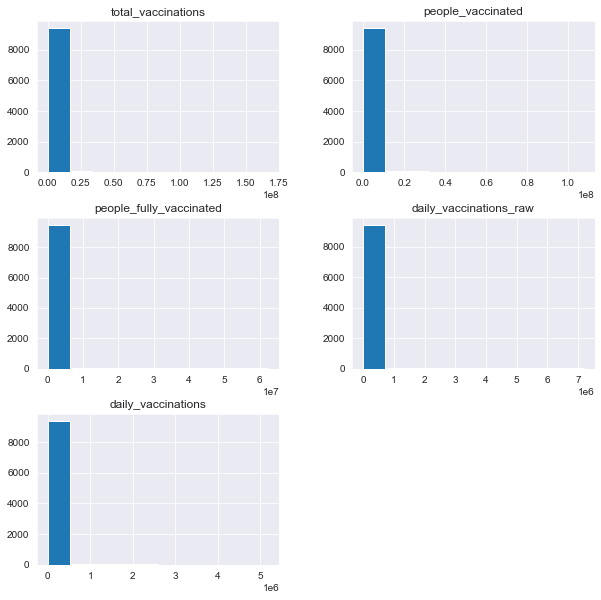

In [104]:
df.hist(figsize= (10,10));

<AxesSubplot:>

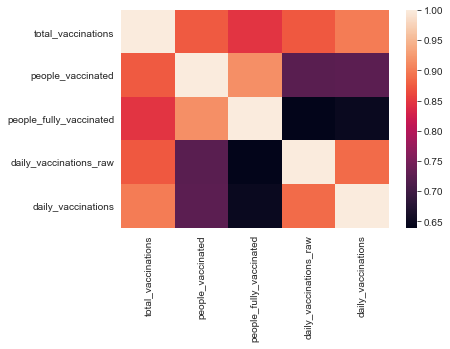

In [105]:
sns.heatmap(df.corr())

In [106]:
X = df.loc[:, df.dtypes == np.float64]

In [107]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [108]:
pca = PCA()
X_pca = pca.fit_transform(scaled_X)

In [109]:
pca.components_

array([[ 0.47708397,  0.44932757,  0.4292042 ,  0.43735333,  0.44158967],
       [ 0.04930383, -0.42477454, -0.59517468,  0.48728443,  0.47482281],
       [ 0.20733577, -0.17356366,  0.04642517, -0.72790371,  0.62840149],
       [-0.27251174,  0.76393843, -0.53905367, -0.1394814 ,  0.17916891],
       [ 0.80790423,  0.06280965, -0.41087309, -0.14824665, -0.39057898]])

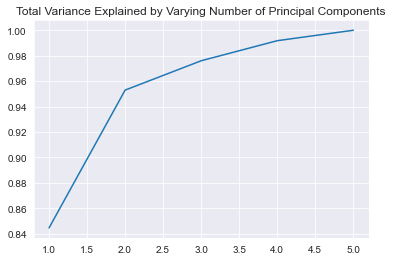

In [110]:
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principal Components');

In [111]:
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(scaled_X)

### K-Means Clustering

#### Determine Number of Clusters

*Elbow Plot*

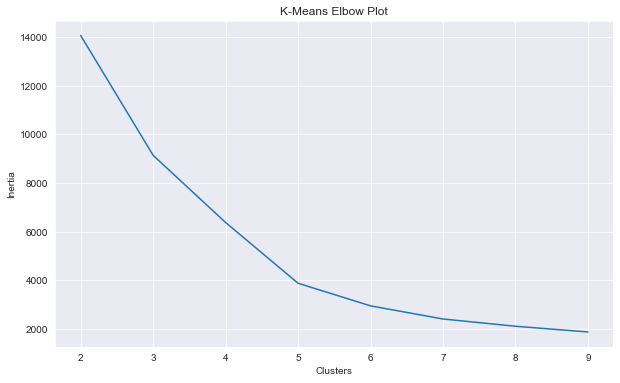

In [112]:
# find right amount of clusters
results = []
N = range(2,10)
for n in N:
    model = KMeans(n_clusters= n, random_state= 27)
    model.fit(X_pca)
    results.append(model.inertia_)
    
# plot elbow plot
plt.figure(figsize= (10, 6))
plt.plot(N, results)
plt.title('K-Means Elbow Plot')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

K-Means using 5 clusters

In [113]:
# unscaled, original data
k_means_orig = KMeans(n_clusters = 5)
y_preds_orig = k_means_orig.fit_predict(X)

CH_score = calinski_harabasz_score(X, y_preds_orig)
CH_score

27507.69126051822

In [114]:
len(y_preds_orig)

9587

In [115]:
# scaled data
k_means = KMeans(n_clusters = 5)
y_preds_scaled = k_means.fit_predict(scaled_X)

CH_score = calinski_harabasz_score(scaled_X, y_preds_scaled)
CH_score

17661.309549762005

In [116]:
# pca and scaled data
k_means_pca = KMeans(n_clusters = 5, random_state= 27)
y_preds_pca = k_means_pca.fit_predict(X_pca)

CH_score = calinski_harabasz_score(X_pca, y_preds_pca)
CH_score

25845.354035523742

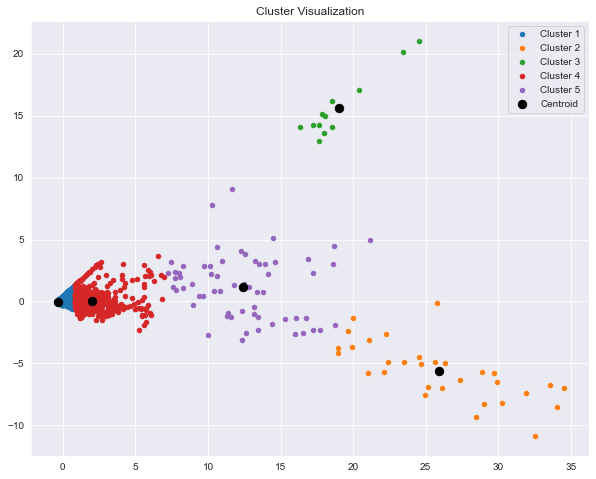

In [117]:
# visualize the clusters
plt.subplots(figsize= (10, 8))
plt.scatter(X_pca[y_preds_pca == 0, 0], X_pca[y_preds_pca == 0, 1], s= 20, label= 'Cluster 1')
plt.scatter(X_pca[y_preds_pca == 1, 0], X_pca[y_preds_pca == 1, 1], s= 20, label= 'Cluster 2')
plt.scatter(X_pca[y_preds_pca == 2, 0], X_pca[y_preds_pca == 2, 1], s= 20, label= 'Cluster 3')
plt.scatter(X_pca[y_preds_pca == 3, 0], X_pca[y_preds_pca == 3, 1], s= 20, label= 'Cluster 4')
plt.scatter(X_pca[y_preds_pca == 4, 0], X_pca[y_preds_pca == 4, 1], s= 20, label= 'Cluster 5')

plt.scatter(k_means_pca.cluster_centers_[:, 0], 
            k_means_pca.cluster_centers_[:, 1], 
            s= 70, c= 'black', label= 'Centroid')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

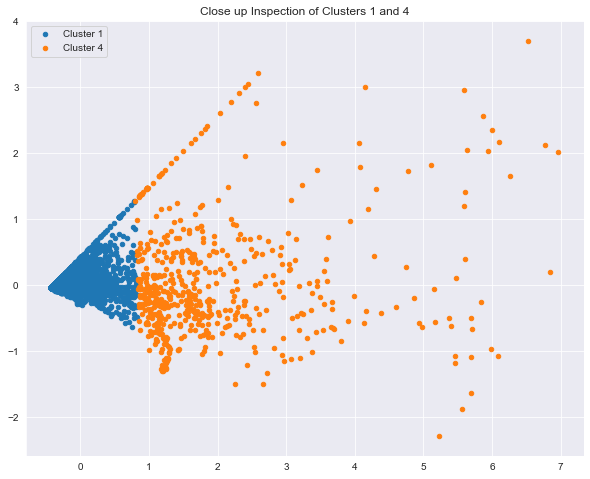

In [118]:
plt.subplots(figsize= (10, 8))
plt.scatter(X_pca[y_preds_pca == 0, 0], X_pca[y_preds_pca == 0, 1], s= 20, label= 'Cluster 1')
plt.scatter(X_pca[y_preds_pca == 3, 0], X_pca[y_preds_pca == 3, 1], s= 20, label= 'Cluster 4')
plt.title('Close up Inspection of Clusters 1 and 4')
plt.legend();

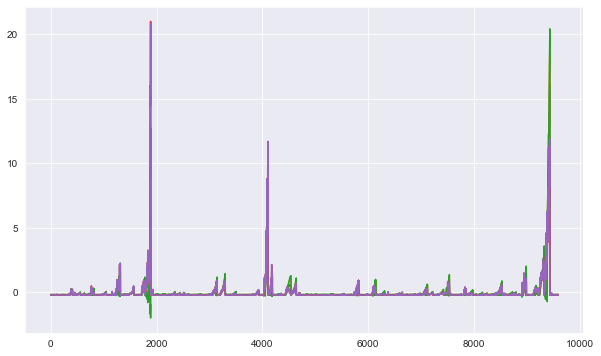

In [119]:
# reprojecting compressed data 
plt.figure(figsize= (10,6))
plt.plot(pca.inverse_transform(X_pca));

In [120]:
cluster_df = df.copy()
cluster_df['cluster'] = y_preds_pca

cluster_df[cluster_df.cluster == 0]

location iso_code        date  total_vaccinations  people_vaccinated  \
0     Afghanistan      AFG  2021-02-22                 0.0                0.0   
1     Afghanistan      AFG  2021-02-23                 0.0                0.0   
2     Afghanistan      AFG  2021-02-24                 0.0                0.0   
3     Afghanistan      AFG  2021-02-25                 0.0                0.0   
4     Afghanistan      AFG  2021-02-26                 0.0                0.0   
...           ...      ...         ...                 ...                ...   
9582     Zimbabwe      ZWE  2021-03-30             85866.0            72944.0   
9583     Zimbabwe      ZWE  2021-03-31             91880.0            76995.0   
9584     Zimbabwe      ZWE  2021-04-01            105307.0            87791.0   
9585     Zimbabwe      ZWE  2021-04-02            124753.0           103815.0   
9586     Zimbabwe      ZWE  2021-04-03            132915.0           111588.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                         0.0                     0.0                 0.0   
1                         0.0                     0.0              1367.0   
2                         0.0                     0.0              1367.0   
3                         0.0                     0.0              1367.0   
4                         0.0                     0.0              1367.0   
...                       ...                     ...                 ...   
9582                  12922.0                  4256.0              5810.0   
9583                  14885.0                  6014.0              5712.0   
9584                  17516.0                 13427.0              6617.0   
9585                  20938.0                 19446.0              8156.0   
9586                  21327.0                  8162.0              8498.0   

                  Region         Income group  cluster  
0             South Asia           Low income        0  
1             South Asia           Low income        0  
2             South Asia           Low income        0  
3             South Asia           Low income        0  
4             South Asia           Low income        0  
...                  ...                  ...      ...  
9582  Sub-Saharan Africa  Lower middle income        0  
9583  Sub-Saharan Africa  Lower middle income        0  
9584  Sub-Saharan Africa  Lower middle income        0  
9585  Sub-Saharan Africa  Lower middle income        0  
9586  Sub-Saharan Africa  Lower middle income        0  

[8925 rows x 11 columns]

In [121]:
cluster_df.to_csv('data/countries_clusters.csv', index= False)

### Plot Clusters on Map

In [122]:
# plot map of clusters
colors = px.colors.qualitative.Bold[:5]

fig = go.Figure(data= go.Choropleth(
    locations= cluster_df['iso_code'], 
    z= cluster_df['cluster'], 
    text= cluster_df['location'], 
    colorscale= colors,
    colorbar_dtick= 1,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Cluster',))

fig.update_layout(
    title_text='K-Means Clusters by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

We can see that K-Means clustered the United States, China, and India separately. Then it gathered various countries into the other two clusters. We can also see that we do not have data for some countries. It is more than likely that these countries have not begun vaccinating residents, or have not reported their data.

In [123]:
cluster_df.sort_values(by = ['date', 'daily_vaccinations'], ascending= False)[:20]

location iso_code        date  total_vaccinations  \
1889                 China      CHN  2021-04-05         142802000.0   
4103                 India      IND  2021-04-05          83110926.0   
9430         United States      USA  2021-04-05         167187795.0   
1313                Brazil      BRA  2021-04-05          21960953.0   
5818                Mexico      MEX  2021-04-05           9287405.0   
8985                Turkey      TUR  2021-04-05          16993574.0   
4638                 Italy      ITA  2021-04-05          11252066.0   
1570                Canada      CAN  2021-04-05           6555389.0   
8524                 Spain      ESP  2021-04-05           8743694.0   
1777                 Chile      CHL  2021-04-05          11060230.0   
7532                Russia      RUS  2021-04-05          12215342.0   
7842          Saudi Arabia      SAU  2021-04-05           5114583.0   
3927               Hungary      HUN  2021-04-05           3355199.0   
409              Argentina      ARG  2021-04-05           4260808.0   
6137               Morocco      MAR  2021-04-05           8303056.0   
9210  United Arab Emirates      ARE  2021-04-05           8596722.0   
6646               Oceania      OCE  2021-04-05            912975.0   
4710                 Japan      JPN  2021-04-05           1196884.0   
459              Australia      AUS  2021-04-05            844309.0   
637             Azerbaijan      AZE  2021-04-05            947947.0   

      people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
1889                0.0                      0.0               2832000.0   
4103         72277309.0               10833617.0               4005763.0   
9430        107515428.0               62392065.0               2134049.0   
1313         17128933.0                4832020.0                890825.0   
5818          8113230.0                1174175.0                251405.0   
8985          9796506.0                7197068.0                310507.0   
4638          7770638.0                3481428.0                160628.0   
1570          5836927.0                 718462.0                183279.0   
8524          5890888.0                2852806.0                     0.0   
1777          7017559.0                4042671.0                268597.0   
7532          7576640.0                4638702.0                 94532.0   
7842                0.0                      0.0                120007.0   
3927          2432313.0                 922886.0                 79348.0   
409           3576423.0                 684385.0                 26303.0   
6137          4352033.0                3951023.0                     0.0   
9210                0.0                      0.0                 17743.0   
6646           211477.0                  16483.0                  1127.0   
4710           956638.0                 240246.0                     0.0   
459                 0.0                      0.0                  1127.0   
637            591012.0                 356935.0                   202.0   

      daily_vaccinations                      Region         Income group  \
1889           4548571.0         East Asia & Pacific  Upper middle income   
4103           3142510.0                  South Asia  Lower middle income   
9430           3053566.0               North America          High income   
1313            554114.0   Latin America & Caribbean  Upper middle income   
5818            324137.0   Latin America & Caribbean  Upper middle income   
8985            292045.0       Europe & Central Asia  Upper middle income   
4638            219121.0       Europe & Central Asia          High income   
1570            179165.0               North America          High income   
8524            167465.0       Europe & Central Asia          High income   
1777            162239.0   Latin America & Caribbean          High income   
7532            155856.0       Europe & Central Asia  Upper middle income   
7842 

The first 3 countries have daily vaccinations in the millions. The countries with the 4th through 11th highest daily vaccination are ranked together as well in the fourth cluster. That seems to have been a promising feature for the clusters, though not the only feature it was considering as Israel is in the fourth cluster but not in the top 20 for daily vaccinations.

In [124]:
cluster_df.sort_values(by = ['date', 'total_vaccinations'], ascending= False)[:20]

location iso_code        date  total_vaccinations  \
9430         United States      USA  2021-04-05         167187795.0   
1889                 China      CHN  2021-04-05         142802000.0   
4103                 India      IND  2021-04-05          83110926.0   
1313                Brazil      BRA  2021-04-05          21960953.0   
8985                Turkey      TUR  2021-04-05          16993574.0   
7532                Russia      RUS  2021-04-05          12215342.0   
4638                 Italy      ITA  2021-04-05          11252066.0   
1777                 Chile      CHL  2021-04-05          11060230.0   
4538                Israel      ISR  2021-04-05          10139337.0   
5818                Mexico      MEX  2021-04-05           9287405.0   
8524                 Spain      ESP  2021-04-05           8743694.0   
9210  United Arab Emirates      ARE  2021-04-05           8596722.0   
6137               Morocco      MAR  2021-04-05           8303056.0   
1570                Canada      CAN  2021-04-05           6555389.0   
813             Bangladesh      BGD  2021-04-05           5539494.0   
7842          Saudi Arabia      SAU  2021-04-05           5114583.0   
409              Argentina      ARG  2021-04-05           4260808.0   
3927               Hungary      HUN  2021-04-05           3355199.0   
7972                Serbia      SRB  2021-04-05           2593838.0   
7216              Portugal      PRT  2021-04-05           1907551.0   

      people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
9430        107515428.0               62392065.0               2134049.0   
1889                0.0                      0.0               2832000.0   
4103         72277309.0               10833617.0               4005763.0   
1313         17128933.0                4832020.0                890825.0   
8985          9796506.0                7197068.0                310507.0   
7532          7576640.0                4638702.0                 94532.0   
4638          7770638.0                3481428.0                160628.0   
1777          7017559.0                4042671.0                268597.0   
4538          5277886.0                4861451.0                 29580.0   
5818          8113230.0                1174175.0                251405.0   
8524          5890888.0                2852806.0                     0.0   
9210                0.0                      0.0                 17743.0   
6137          4352033.0                3951023.0                     0.0   
1570          5836927.0                 718462.0                183279.0   
813           5539494.0                      0.0                 41322.0   
7842                0.0                      0.0                120007.0   
409           3576423.0                 684385.0                 26303.0   
3927          2432313.0                 922886.0                 79348.0   
7972          1481015.0                1112823.0                 26146.0   
7216          1330752.0                 576799.0                  1607.0   

      daily_vaccinations                      Region         Income group  \
9430           3053566.0               North America          High income   
1889           4548571.0         East Asia & Pacific  Upper middle income   
4103           3142510.0                  South Asia  Lower middle income   
1313            554114.0   Latin America & Caribbean  Upper middle income   
8985            292045.0       Europe & Central Asia  Upper middle income   
7532            155856.0       Europe & Central Asia  Upper middle income   
4638            219121.0       Europe & Central Asia          High income   
1777            162239.0   Latin America & Caribbean          High income   
4538             23194.0  Middle East & North Africa          High income   
5818            324137.0   Latin America & Caribbean  Upper middle income   
8524            167465.0       Europe & Central Asia          High income   
9210 

It will be interesting to watch as the next months unfold and hopefully vaccinations are able to reach areas that are yet unreported in this data.

### Add More Data

Let's add more data from the large dataset and see if the clusters change.

In [125]:
cols_to_add = owid_df[['location', 'date', 'new_cases', 'new_deaths', 'reproduction_rate', 'aged_65_older', 
               'hospital_beds_per_thousand', 'population', 'population_density', 
               'median_age', 'gdp_per_capita', 'cardiovasc_death_rate', 
               'diabetes_prevalence', 'life_expectancy', 'human_development_index']]

In [126]:
cols_to_add.isna().sum()

location                          0
date                              0
new_cases                      1697
new_deaths                    11040
reproduction_rate             15684
aged_65_older                  8666
hospital_beds_per_thousand    13307
population                      501
population_density             5505
median_age                     7828
gdp_per_capita                 7525
cardiovasc_death_rate          6896
diabetes_prevalence            5903
life_expectancy                4104
human_development_index        6990
dtype: int64

In [127]:
# merge dataframes
countries_all = pd.merge(countries_df, country_incomes, how= 'left', on= 'Code')
countries_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4010 entries, 0 to 4009
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   4010 non-null   object        
 1   Code                     3648 non-null   object        
 2   Day                      4010 non-null   datetime64[ns]
 3   people_fully_vaccinated  4010 non-null   int64         
 4   Economy                  3624 non-null   object        
 5   Region                   3624 non-null   object        
 6   Income group             3624 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 250.6+ KB


In [128]:
df = pd.merge(df, cols_to_add, how= 'left', on = ['location', 'date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9587 entries, 0 to 9586
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    9587 non-null   object 
 1   iso_code                    9587 non-null   object 
 2   date                        9587 non-null   object 
 3   total_vaccinations          9587 non-null   float64
 4   people_vaccinated           9587 non-null   float64
 5   people_fully_vaccinated     9587 non-null   float64
 6   daily_vaccinations_raw      9587 non-null   float64
 7   daily_vaccinations          9587 non-null   float64
 8   Region                      9587 non-null   object 
 9   Income group                9587 non-null   object 
 10  new_cases                   8618 non-null   float64
 11  new_deaths                  8510 non-null   float64
 12  reproduction_rate           8533 non-null   float64
 13  aged_65_older               8309 

In [129]:
nulls = df[df['population'].isna()]

In [130]:
nulls.location.unique()

array(['Northern Cyprus'], dtype=object)

We need 'population' to be complete because we will be using that column calculate the percent of the population that has been vaccinated. So let's fill those in.

In [131]:
pop_countries = {'England': 67886011, 'Northern Cyprus': 1215584, 
                 'Northern Ireland': 1885000, 'Scotland': 5454000,
                 'Wales': 3136000}

In [132]:
df['population'] = df['population'].fillna(df['location'].map(pop_countries))

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9587 entries, 0 to 9586
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    9587 non-null   object 
 1   iso_code                    9587 non-null   object 
 2   date                        9587 non-null   object 
 3   total_vaccinations          9587 non-null   float64
 4   people_vaccinated           9587 non-null   float64
 5   people_fully_vaccinated     9587 non-null   float64
 6   daily_vaccinations_raw      9587 non-null   float64
 7   daily_vaccinations          9587 non-null   float64
 8   Region                      9587 non-null   object 
 9   Income group                9587 non-null   object 
 10  new_cases                   8618 non-null   float64
 11  new_deaths                  8510 non-null   float64
 12  reproduction_rate           8533 non-null   float64
 13  aged_65_older               8309 

In [134]:
df['pop_vax_percent'] = round(df['people_fully_vaccinated']\
                                      / df['population'] *100, 2)

In [135]:
df.fillna(0, axis= 1, inplace= True)

#### K-Means Cluster with More Data

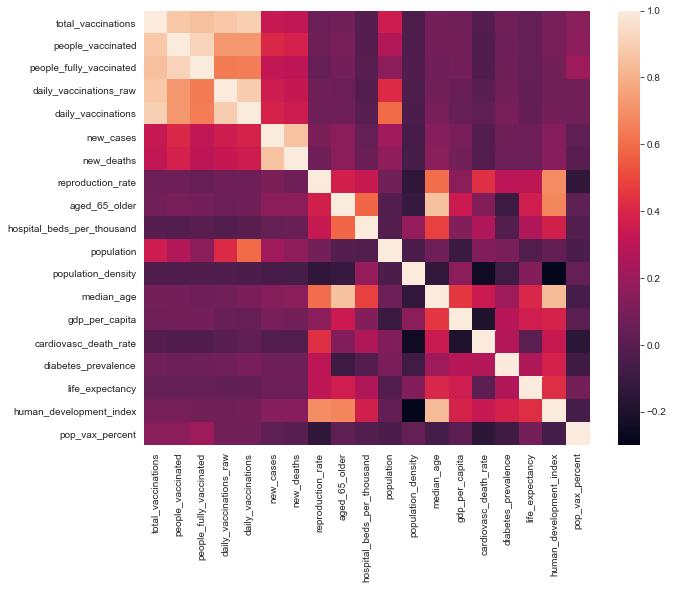

In [136]:
plt.figure(figsize= (10, 8))
sns.heatmap(df.corr());

In [137]:
# create dataset with only numerical data
X = df.loc[:, df.dtypes == np.float64]

In [138]:
# standardize data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [139]:
# pca to reduce dimensionality
pca = PCA()
X_pca = pca.fit_transform(scaled_X)

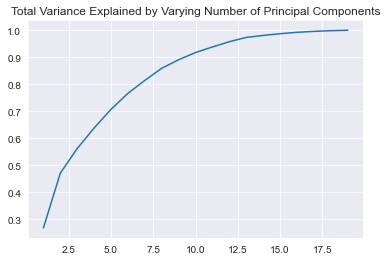

In [140]:
plt.plot(range(1,20), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principal Components');

In [141]:
# find number of features needed to capture 95% of data's overall variance
total_exp_var = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_exp_var[total_exp_var >= .95])
n_to_hit_95 = X.shape[1] - n_over_95 + 1

print('Number of features: {}\t Total Variance Explained: {}'\
     .format(n_to_hit_95, total_exp_var[n_to_hit_95 - 1]))

Number of features: 12	 Total Variance Explained: 0.957770574497691


Looks like we can use 12 features instead of all 20.

In [142]:
# pca to reduce dimensionality
pca = PCA(n_components= 12, random_state= 27)
X_pca = pca.fit_transform(scaled_X)

#### Elbow Plot and Silhouette Coefficient

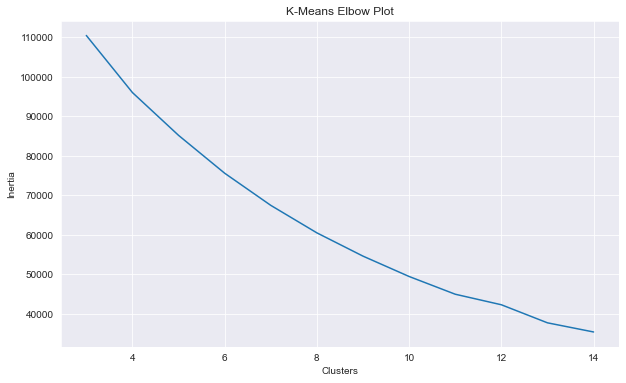

In [143]:
# find right amount of clusters
results = []
N = range(3,15)
for n in N:
    model = KMeans(n_clusters= n, random_state= 27)
    model.fit(X_pca)
    results.append(model.inertia_)
    
# plot elbow plot
plt.figure(figsize= (10, 6))
plt.plot(N, results)
plt.title('K-Means Elbow Plot')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [144]:
# determine silhouette score and see which number is highest
for n_cluster in range(3,15):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 3 Clusters: 0.4649
Silhouette Score for 4 Clusters: 0.2578
Silhouette Score for 5 Clusters: 0.2645
Silhouette Score for 6 Clusters: 0.2853
Silhouette Score for 7 Clusters: 0.3104
Silhouette Score for 8 Clusters: 0.3275
Silhouette Score for 9 Clusters: 0.3016
Silhouette Score for 10 Clusters: 0.3194
Silhouette Score for 11 Clusters: 0.3260
Silhouette Score for 12 Clusters: 0.3367
Silhouette Score for 13 Clusters: 0.3423
Silhouette Score for 14 Clusters: 0.3445


It is difficult to determine how may clusters are necessary with just the elbow plot, but the silhouette score makes it easy. We will pick the cluster that has the highest value (except 3 clusters, which does not provide us with much information).

In [161]:
# pca and scaled data
k_means_pca = KMeans(n_clusters = 8)
y_preds_pca = k_means_pca.fit_predict(X_pca)

CH_score = calinski_harabasz_score(X_pca, y_preds_pca)
CH_score

2456.224786053883

The Calinski-Harabaz Index is approximately $\frac{1}{10}$ of what it was when we used less data, but we will continue on and see what happens.

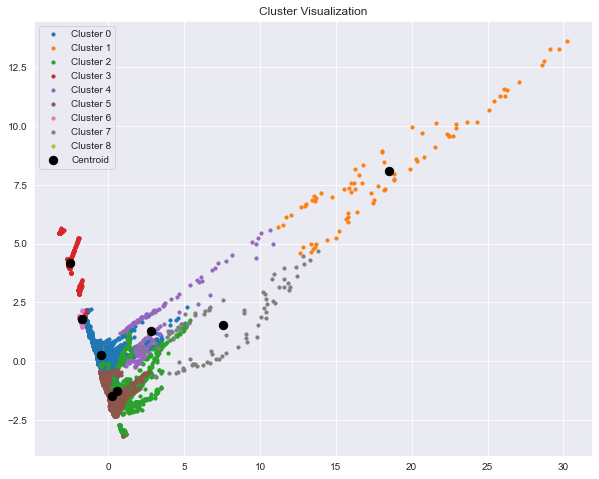

In [162]:
plt.subplots(figsize= (10, 8))
for i in range(0, 9):
    plt.scatter(X_pca[y_preds_pca == i, 0], X_pca[y_preds_pca == i, 1], s= 10, label= 'Cluster {}'.format(i))
    
plt.scatter(k_means_pca.cluster_centers_[:, 0], 
            k_means_pca.cluster_centers_[:, 1], 
            s= 70, c= 'black', label= 'Centroid')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

In [163]:
# add clusters to df so they can be viewed and plotted
cluster2_df = df.copy()
cluster2_df['cluster'] = y_preds_pca

In [164]:
cluster2_df.to_csv('data/countries_clusters_more_data.csv', index= False)

#### Plot on Map

In [174]:
# plot map of clusters
colors = px.colors.qualitative.T10[:8]

fig = go.Figure(data= go.Choropleth(
    locations= cluster2_df['iso_code'], 
    z= cluster2_df['cluster'], 
    text= cluster2_df['location'], 
    colorscale= colors,
    colorbar_dtick= 1, 
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Cluster',))

fig.update_layout(
    title_text='K-Means Cluster by Country with Additional COVID-19 Data',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [166]:
cluster2_df.groupby('cluster')['location'].unique()

cluster
0    [Afghanistan, Algeria, Andorra, Angola, Antigu...
1                        [China, India, United States]
2    [Australia, Austria, Belgium, Canada, Chile, C...
3    [Anguilla, Bermuda, Cayman Islands, Faeroe Isl...
4                                       [China, India]
5    [Albania, Argentina, Azerbaijan, Barbados, Bel...
6                                      [Macao, Monaco]
7                      [Brazil, Mexico, United States]
Name: location, dtype: object

This clustering is much more complex and it is difficult to tell what criteria is being used to split the data.

### Hierarchical Agglomerative Clustering

In [151]:
hac = AgglomerativeClustering(n_clusters= 5)
hac_orig = hac.fit_predict(X)
hac_preds_orig = hac.labels_

CH_score = calinski_harabasz_score(X, hac_preds_orig)
CH_score

291054.99157181225

In [152]:
hac = AgglomerativeClustering(n_clusters= 5)
hac_scaled = hac.fit_predict(scaled_X)
hac_preds_scaled = hac.labels_

CH_score = calinski_harabasz_score(scaled_X, hac_preds_scaled)
CH_score

2156.3565351795496

In [153]:
hac = AgglomerativeClustering(n_clusters= 5)
hac_pca = hac.fit_predict(X_pca)
hac_preds_pca = hac.labels_

CH_score = calinski_harabasz_score(X_pca, hac_preds_pca)
CH_score

2350.8393459694475

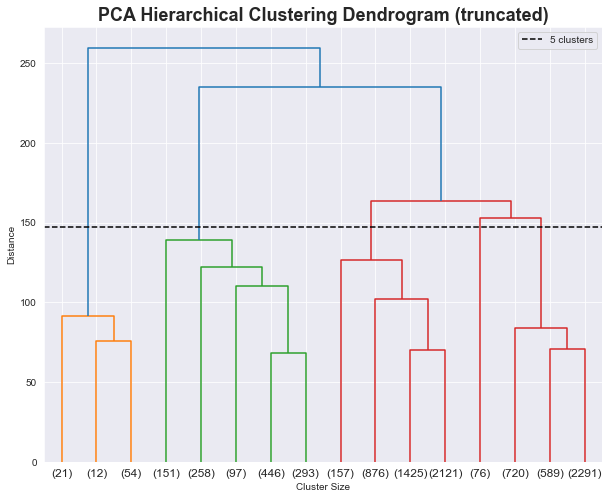

In [173]:
# plot pca dendrogram
plt.figure(figsize= (10, 8))
linkage_array = ward(X_pca)
dendrogram(linkage_array, truncate_mode= 'lastp', p = 16)
plt.hlines(y= 147, xmin= 0, xmax= 348, colors= 'black', linestyles= 'dashed', label= '5 clusters')
ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.legend()
plt.title('PCA Hierarchical Clustering Dendrogram (truncated)', fontsize = 18, fontweight= 'bold');

Now let's see if we can view it's clusters the same way we did with K-Means.

In [155]:
cluster_df['cluster_hac'] = hac_preds_pca

In [156]:
# save to same df with new column
cluster_df.to_csv('data/countries_clusters.csv', index= False)

### Plot HAC 

In [157]:
# plot map of clusters
colors = px.colors.qualitative.T10[:5]

fig = go.Figure(data= go.Choropleth(
    locations= cluster_df['iso_code'], 
    z= cluster_df['cluster_hac'], 
    text= cluster_df['location'], 
    colorscale= colors,
    colorbar_dtick= 1, 
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Cluster',))


fig.update_layout(
    title_text='Hierarchical Agglomerative Clustering by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [158]:
cluster_df.groupby('cluster_hac')['location'].unique()

cluster_hac
0    [Anguilla, Bermuda, Cayman Islands, Dominica, ...
1    [Afghanistan, Albania, Algeria, Andorra, Angol...
2    [Australia, Austria, Belarus, Belgium, Brazil,...
3                        [China, India, United States]
4                              [Brazil, United States]
Name: location, dtype: object